# Home Credit Default Risk

# GROUP-05-HCDR

***

## Team and project meta information

### Members:
* Athulya Anand - 2000923101 - athanand@iu.edu  
* Shubham Patil - 2000938033 - shupatil@iu.edu    
* Sricharraan Ramaswamy - 2000855651 - sriramas@iu.edu     
* Varsha R - 2000751388 - varavi@iu.edu

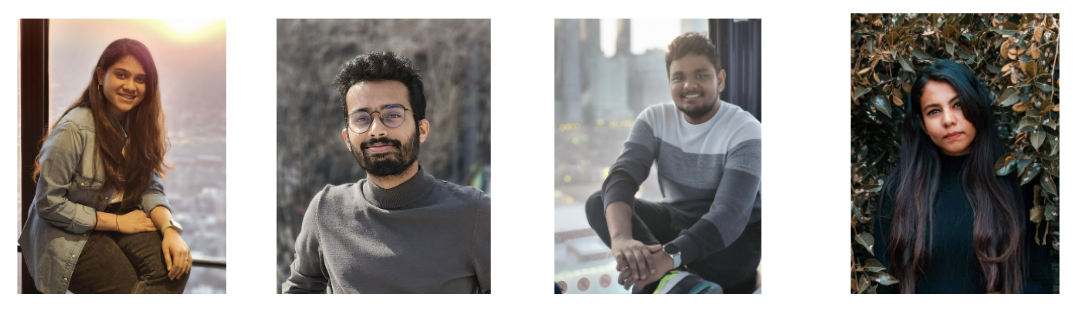

***

## Project Abstract

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/).

The challenge is to construct a model that can predict the level of risk associated with an individual loan. With this project, we intend to use historical loan application data to predict whether or not a borrower will be able to repay a loan. 

Based on our comparison of results from phase 1, the following two algorithms were shortlisted:
* Naive Bayes
* Logistic Regression
* Random Forest

In phase 1, we faced issues related to data size, unwanted data and lack of data tuning. In phase 2, our main goal is to add __feature engineering__ (which includes optimizing the data by removing the missing values, merging correlated data and implement one hot encoding) and __hyperparameter tuning__ (which includes tuning the algorithm by choosing the optimal set of parameters using GridSearchCV) to the phase 1 algorithm. 

Implementing feature engineering and hyperparameter tuning to the models gave us the following results:
* Best model pipeline - Logistic Regression
* Kernel training score - 0.943723	
* Kernel testing score - 0.922078
* Private kaggle score - 0.73081
* Public kaggle score - 0.73694


***

## Project Description (tasks and data)

### Data

Dataset link: https://www.kaggle.com/c/home-credit-default-risk/data

#### Background of the data

Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

#### Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

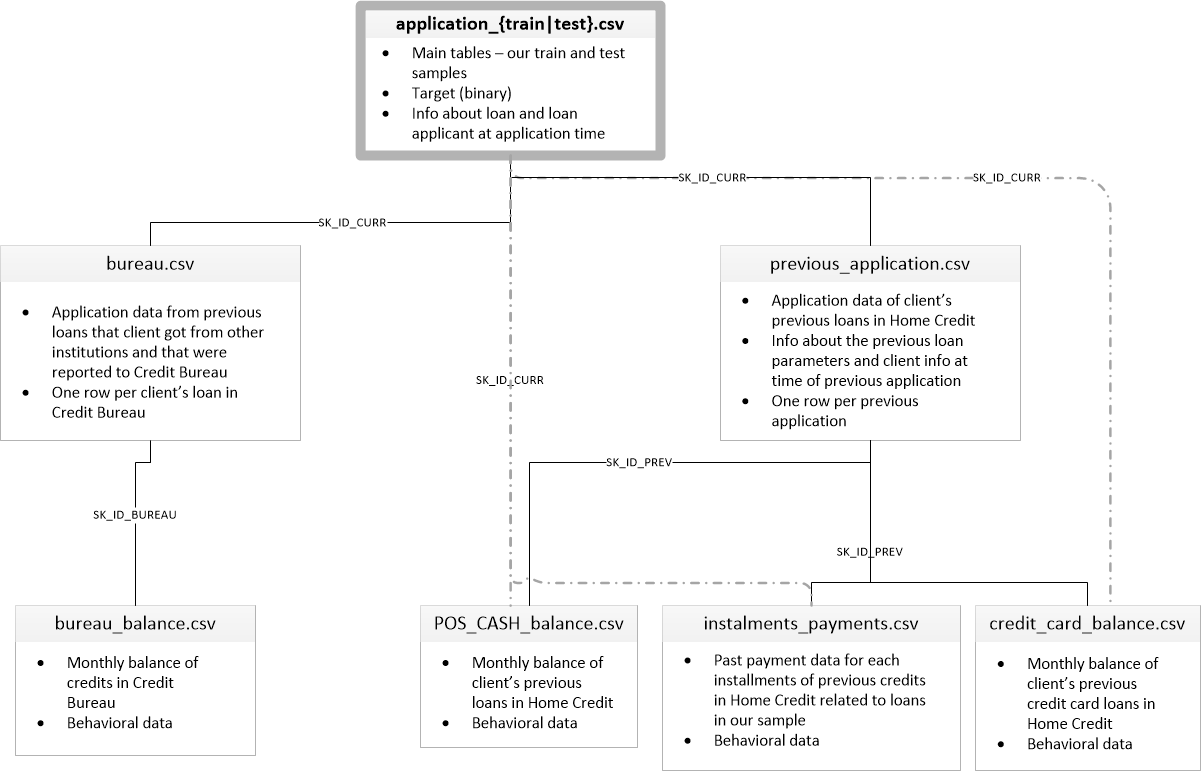

### Tasks

* __Data description:__ Using various pandas dataframe, we can extract all the required description of the data.

* __Eliminating the missing data:__ To check for any Kind of Null values/missing values in our data and to understand the type of values/datatype|featulespresentin the dataset values as zeroes.

* __Check and Remove columns with missing data:__ After checking for missing values, me remone more than 25% of the missing data. Similarly, me will remove the columns having more than 85% rows that contain values as zeros only.

* __Data Segregation:__ Segregation of our data into Categorical & Numerical Variables.

* __Data joining/merging:__ Joining the features that have high correlation.

* __Best feature extraction:__ Extracting the top important features for the model pipelining and hyperparameter tuning.

* __Hyperparameter tuning:__ Tuning the parameters to find the best fit for the models by implementing GridSearchCV.

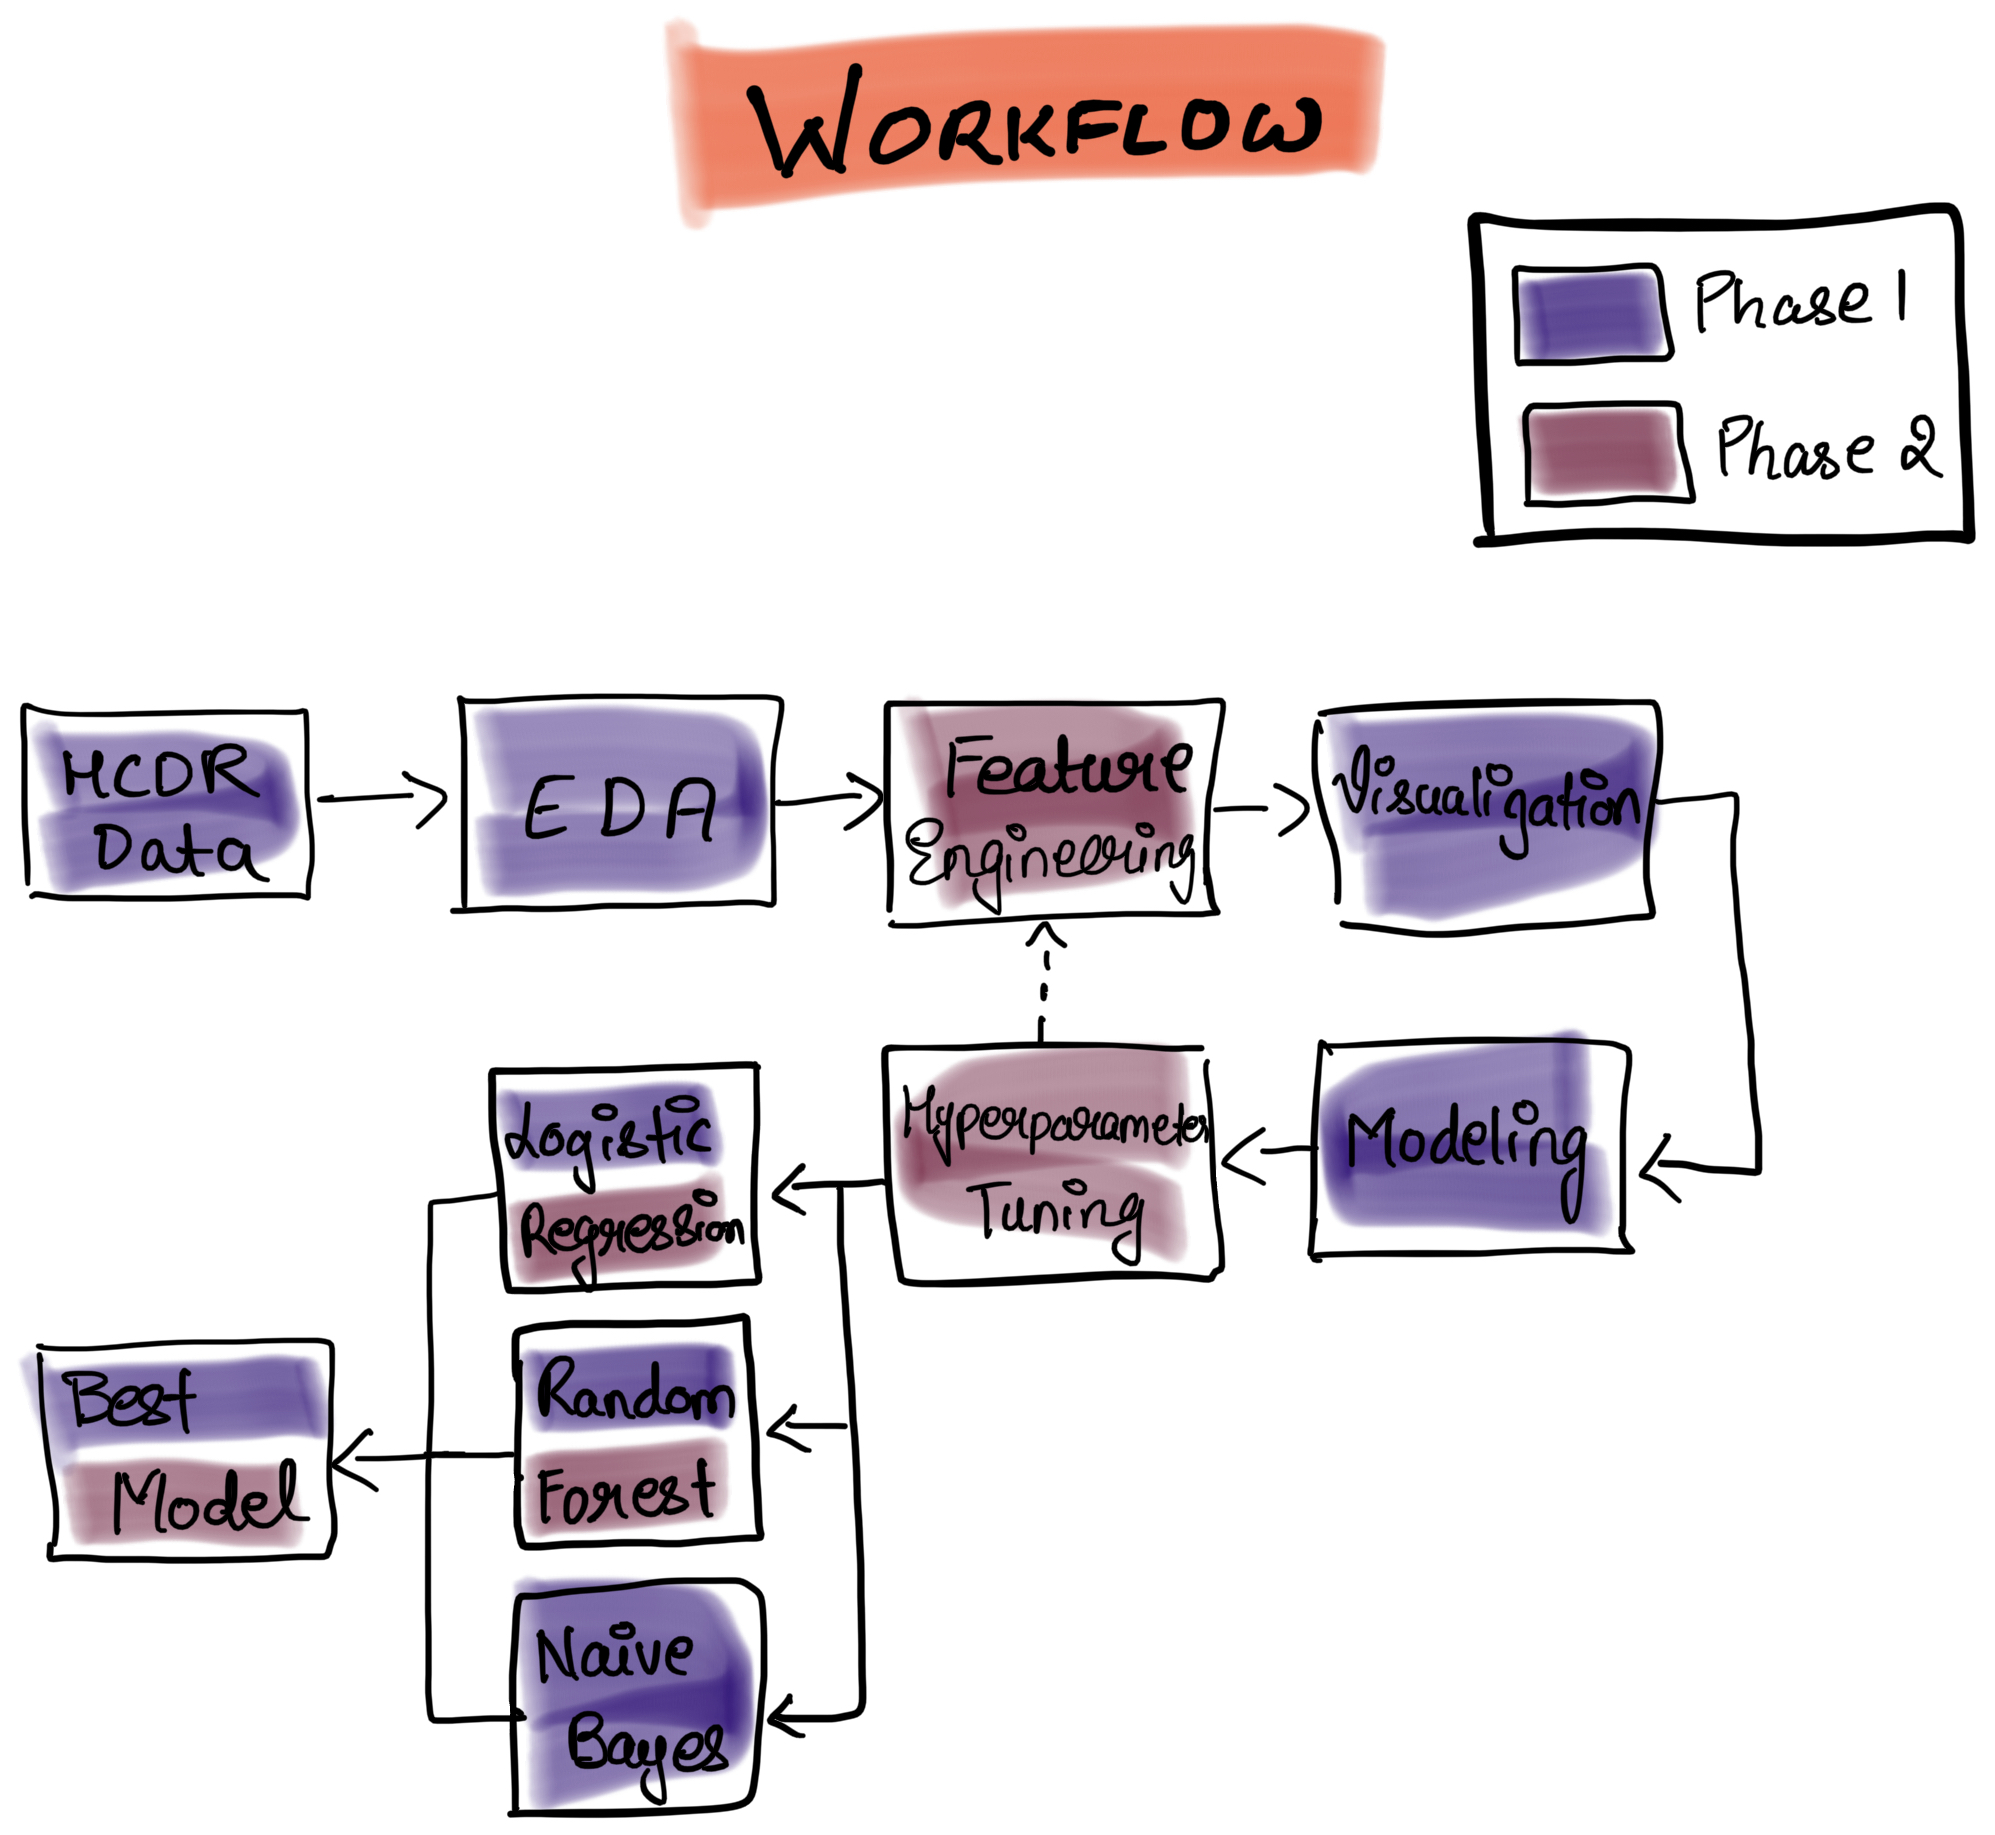

Importing all the necessary python libraries:

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Reading the csv data files:

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [3]:
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')

In [4]:
install_payment = pd.read_csv('installments_payments.csv')
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')

In [5]:
install_payment = install_payment.groupby('SK_ID_CURR').median()
pos_cash_balance = pos_cash_balance.groupby('SK_ID_CURR').median()
previous_application = previous_application.groupby('SK_ID_CURR').median()
credit_card_balance = credit_card_balance.groupby('SK_ID_CURR').median()

***

## Exploratory Data Analysis + Feature Engineering

EDA, or exploratory data analysis, is an essential component of any Data Analysis or Data Science project. Essentially, EDA entails analyzing the dataset to identify patterns, anomalies (outliers), and hypotheses based on our understanding of the dataset.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate.

### Data description using pandas dataframe

Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

* __head():__ This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. For negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n].

* __describe():__ Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

* __info():__ Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.

#### Training data information

In [6]:
print ("\nhead():\n")
df_train.head()


head():



SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [7]:
print ("\ndescribe():\n")
df_train.describe()


describe():



SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [8]:
print ("\ninfo():\n")
df_train.info()


info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Testing data information

In [9]:
print ("\nhead():\n")
df_test.head()


head():



SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [10]:
print ("\ndescribe():\n")
df_test.describe()


describe():



SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [11]:
print ("\ninfo():\n")
df_test.info()


info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


### Feature Extraction - Phase 1

By creating new features from the existing ones (and then discarding the original features), Feature Extraction attempts to reduce the number of features in a dataset. The new reduced set of features will be able to summarize much of the information that was contained in the original set of features. Thus, an abridged version of the original features can be created by combining them.

In our analysis of the data, we found that there are many missing values. Columns with more than 25% of missing values were removed. Our team checked the columns for the distribution of 0's and removed the columns with 85% of rows with only 0's. In addition, we divided the data into numerical and categorical data. The numerical data was handled by creating an intermediate imputer pipeline in which the missing values were replaced with the mean of the data, while the missing values in categorical missing data were handled by encoding the data based upon OHE (One Hot Encoding) and replacing the missing values with the mode of the columns.

Firstly, let's find the percentage of the missing values in each column:

In [12]:
def missing_percentage(df):
    missing_values = df.isnull().sum(axis=0)*100/len(df)
    return missing_values.sort_values(ascending=False)

Using 25% as the missing treshold value, we extract all the columns that has missing percentage less than the treshold value:

col_name  percentage_missing  \
0                COMMONAREA_MEDI           69.872297   
1                 COMMONAREA_AVG           69.872297   
2                COMMONAREA_MODE           69.872297   
3       NONLIVINGAPARTMENTS_MODE           69.432963   
4        NONLIVINGAPARTMENTS_AVG           69.432963   
5       NONLIVINGAPARTMENTS_MEDI           69.432963   
6             FONDKAPREMONT_MODE           68.386172   
7          LIVINGAPARTMENTS_MODE           68.354953   
8           LIVINGAPARTMENTS_AVG           68.354953   
9          LIVINGAPARTMENTS_MEDI           68.354953   
10                 FLOORSMIN_AVG           67.848630   
11                FLOORSMIN_MODE           67.848630   
12                FLOORSMIN_MEDI           67.848630   
13              YEARS_BUILD_MEDI           66.497784   
14              YEARS_BUILD_MODE           66.497784   
15               YEARS_BUILD_AVG           66.497784   
16                   OWN_CAR_AGE           65.990810   
17                 LANDAREA_MEDI           59.376738   
18                 LANDAREA_MODE           59.376738   
19                  LANDAREA_AVG           59.376738   
20             BASEMENTAREA_MEDI           58.515956   
21              BASEMENTAREA_AVG           58.515956   
22             BASEMENTAREA_MODE           58.515956   
23                  EXT_SOURCE_1           56.381073   
24            NONLIVINGAREA_MODE           55.179164   
25             NONLIVINGAREA_AVG           55.179164   
26            NONLIVINGAREA_MEDI           55.179164   
27                ELEVATORS_MEDI           53.295980   
28                 ELEVATORS_AVG           53.295980   
29                ELEVATORS_MODE           53.295980   
30            WALLSMATERIAL_MODE           50.840783   
31               APARTMENTS_MEDI           50.749729   
32                APARTMENTS_AVG           50.749729   
33               APARTMENTS_MODE           50.749729   
34                ENTRANCES_MEDI           50.348768   
35                 ENTRANCES_AVG           50.348768   
36                ENTRANCES_MODE           50.348768   
37                LIVINGAREA_AVG           50.193326   
38               LIVINGAREA_MODE           50.193326   
39               LIVINGAREA_MEDI           50.193326   
40                HOUSETYPE_MODE           50.176091   
41                FLOORSMAX_MODE           49.760822   
42                FLOORSMAX_MEDI           49.760822   
43                 FLOORSMAX_AVG           49.760822   
44  YEARS_BEGINEXPLUATATION_MODE           48.781019   
45  YEARS_BEGINEXPLUATATION_MEDI           48.781019   
46   YEARS_BEGINEXPLUATATION_AVG           48.781019   
47                TOTALAREA_MODE           48.268517   
48           EMERGENCYSTATE_MODE           47.398304   
49               OCCUPATION_TYPE           31.345545   

                            median/Mode       mean  no_of_unique_values  
0                                0.0208   0.044595                 3202  
1                                0.0211   0.044621                 3181  
2                                 0.019   0.042553                 3128  
3                                   0.0   0.008076                  167  
4                                   0.0   0.008809                  386  
5                                   0.0   0.008651                  214  
6   0    reg oper account
dtype: object         NA                    4  
7                                0.0771   0.105645                  736  
8                                0.0756   0.100775                 1868  
9                                0.0761   0.101954                 1097  
10                               0.2083   0.231894                  305  
11                               0.2083   0.228058                   25  
12                               0.2083   0.231625                   47  
13                               0.7585   0.755746                  151  
14                               0.7648   0.759637       

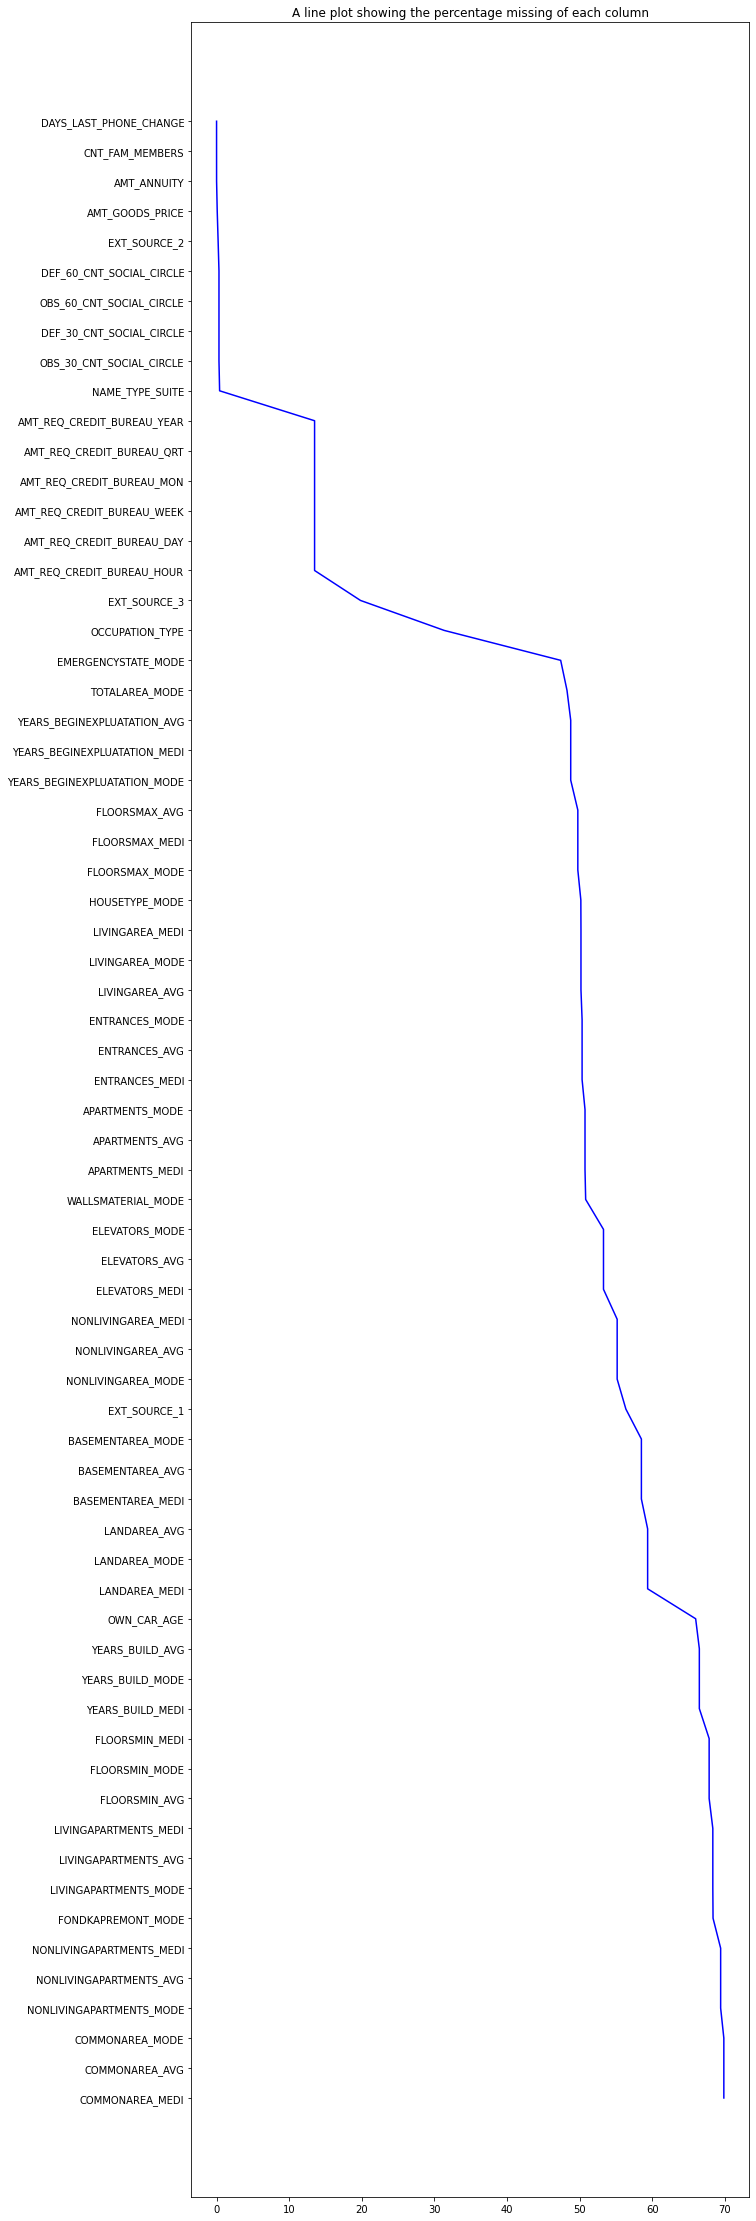

In [13]:
def missing(df,n):
  new_df = missing_percentage(df).reset_index()
  categorical_ = []
  new_df.columns = ['index','flag']
  final_df = []
  for row in new_df.itertuples():
    try:
      final_df.append([row.index,row.flag,df[row.index].median(),df[row.index].mean(), df[row.index].nunique()])
    except:
      final_df.append([row.index,row.flag,df[row.index].mode(),'NA',df[row.index].nunique()])
  columns = ['col_name','percentage_missing','median/Mode','mean','no_of_unique_values']
  temp = pd.DataFrame(final_df,columns=columns)   
  return  temp[temp['percentage_missing']>n]

df_25 = missing(df_train,25)
df_analysis = missing(df_train,0)
plt.figure(figsize=[10,40])
plt.plot(df_analysis['percentage_missing'],df_analysis['col_name'] ,color = 'b')
plt.title('A line plot showing the percentage missing of each column')
df_25

To optimize the data, we check each column for all the zero or null values and if 85% or more of the data in that column is filled with zero or null, we remove that particular column:

In [14]:
df_zero = pd.DataFrame()
columns = []
percentage =[]
for col in df_train.columns:
    if col == 'TARGET':
        continue
    count = (df_train[col] == 0).sum()
    columns.append(col)
    percentage.append(count/len(df_train[col]))
df_zero['Column'] = columns
df_zero['Percentage'] = percentage
per = 85/100
df_zero = df_zero[df_zero['Percentage']>per]

Printing all the columns that contain at least 85% of its data as either zero or null:

In [15]:
more_than_85 = df_zero
more_than_85

Column  Percentage
26                    FLAG_EMAIL    0.943280
33    REG_REGION_NOT_LIVE_REGION    0.984856
34    REG_REGION_NOT_WORK_REGION    0.949231
35   LIVE_REGION_NOT_WORK_REGION    0.959341
36        REG_CITY_NOT_LIVE_CITY    0.921827
91      DEF_30_CNT_SOCIAL_CIRCLE    0.882323
93      DEF_60_CNT_SOCIAL_CIRCLE    0.912881
95               FLAG_DOCUMENT_2    0.999958
97               FLAG_DOCUMENT_4    0.999919
98               FLAG_DOCUMENT_5    0.984885
99               FLAG_DOCUMENT_6    0.911945
100              FLAG_DOCUMENT_7    0.999808
101              FLAG_DOCUMENT_8    0.918624
102              FLAG_DOCUMENT_9    0.996104
103             FLAG_DOCUMENT_10    0.999977
104             FLAG_DOCUMENT_11    0.996088
105             FLAG_DOCUMENT_12    0.999993
106             FLAG_DOCUMENT_13    0.996475
107             FLAG_DOCUMENT_14    0.997064
108             FLAG_DOCUMENT_15    0.998790
109             FLAG_DOCUMENT_16    0.990072
110             FLAG_DOCUMENT_17    0.999733
111             FLAG_DOCUMENT_18    0.991870
112             FLAG_DOCUMENT_19    0.999405
113             FLAG_DOCUMENT_20    0.999493
114             FLAG_DOCUMENT_21    0.999665
115   AMT_REQ_CREDIT_BUREAU_HOUR    0.859696
116    AMT_REQ_CREDIT_BUREAU_DAY    0.860142

Dropping all the columns that contain at least 85% of its data as either zero or null:

In [16]:
df_train.drop(columns = more_than_85['Column'],inplace = True)

In [17]:
df_train =df_train[df_train['NAME_FAMILY_STATUS']!='Unknown']
df_train =df_train[df_train['CODE_GENDER']!='XNA']
df_train =df_train[df_train['NAME_INCOME_TYPE']!='Maternity leave']

Saving all the training data targets in the numerical dataframe:

In [18]:
df_numerical= df_train.select_dtypes(exclude='object')
df_numerical['TARGET'] = df_train['TARGET']
df_categorical= df_train.select_dtypes(include='object')

<ipython-input-18-0c726e26b403>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['TARGET'] = df_train['TARGET']


In [19]:
df_numerical.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307500.000000  307500.000000  307500.000000      3.075000e+05   
mean   278181.087798       0.080725       0.417034      1.687971e+05   
std    102789.822017       0.272413       0.722108      2.371263e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189146.750000       0.000000       0.000000      1.125000e+05   
50%    278202.500000       0.000000       0.000000      1.471500e+05   
75%    367143.250000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075000e+05  307488.000000     3.072240e+05   
mean   5.990259e+05   27108.477604     5.383943e+05   
std    4.024936e+05   14493.600189     3.694459e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307500.000000  307500.000000  307500.000000  ...   
mean                     0.020868  -16037.069246   63817.429333  ...   
std                      0.013831    4363.988872  141277.730537  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
count       137824.000000   159074.000000             306479.000000   
mean             0.028237        0.102548                  1.422202   
std              0.070168        0.107464                  2.400947   
min              0.000000        0.000000                  0.000000   
25%              0.000000        0.041200                  0.000000   
50%              0.003100        0.068800                  0.000000   
75%              0.026600        0.127600                  2.000000   
max              1.000000        1.000000                348.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
count             306479.000000           307499.000000    307500.000000   
mean                   1.405248             -962.865681         0.710049   
std                    2.379760              826.813694         0.453740   
min                    0.000000            -4292.000000         0.000000   
25%                    0.000000            -1570.000000         0.000000   
50%                    0.000000             -757.000000         1.000000   
75%                    2.000000             -274.000000         1.000000   
max                  344.000000                0.000000         1.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265986.000000              265986.000000   
mean                     0.034363                   0.267390   
std                      0.204687                   0.915997   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265986.000000               265986.000000  
mean                    0.265476                    1.899961  
std                     0.794062                    1.869288  
min                     0.000000                    0.000000  

In [20]:
df_categorical.describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307500      307500       307500          307500   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq               278230      202443       202916          213302   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306210           307500                         307500   
unique               7                7                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248520           158771                         218387   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307500             307500          211112   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq               196424             272859           55185   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307500                  307500              97211   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53898                   67992              73827   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153208             151164              161750  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150497              66037              159422

Checking co-relations of each numerical data which is greater than 3% for both positive and negative co-relation:

In [21]:
correlation = df_numerical.corr()['TARGET'].sort_values(ascending = False).reset_index()
correlation.columns = ['col_name','Correlation']
after_correlation = correlation[abs(correlation['Correlation'])>0.03]

after_correlation

col_name  Correlation
0                        TARGET     1.000000
1                    DAYS_BIRTH     0.078236
2   REGION_RATING_CLIENT_W_CITY     0.060875
3          REGION_RATING_CLIENT     0.058882
4        DAYS_LAST_PHONE_CHANGE     0.055228
5               DAYS_ID_PUBLISH     0.051455
6        REG_CITY_NOT_WORK_CITY     0.050981
7                FLAG_EMP_PHONE     0.045978
8               FLAG_DOCUMENT_3     0.044371
9             DAYS_REGISTRATION     0.041950
10                  OWN_CAR_AGE     0.037625
11      LIVE_CITY_NOT_WORK_CITY     0.032500
58                   AMT_CREDIT    -0.030390
59              LIVINGAREA_MODE    -0.030688
60               ELEVATORS_MODE    -0.032132
61               TOTALAREA_MODE    -0.032600
62               FLOORSMIN_MODE    -0.032700
63              LIVINGAREA_MEDI    -0.032743
64               LIVINGAREA_AVG    -0.033001
65               FLOORSMIN_MEDI    -0.033397
66                FLOORSMIN_AVG    -0.033616
67               ELEVATORS_MEDI    -0.033864
68                ELEVATORS_AVG    -0.034200
69   REGION_POPULATION_RELATIVE    -0.037223
70              AMT_GOODS_PRICE    -0.039671
71               FLOORSMAX_MODE    -0.043228
72               FLOORSMAX_MEDI    -0.043770
73                FLOORSMAX_AVG    -0.044005
74                DAYS_EMPLOYED    -0.044927
75                 EXT_SOURCE_1    -0.155333
76                 EXT_SOURCE_2    -0.160451
77                 EXT_SOURCE_3    -0.178926

Checking for data that contains no missing values in the categorical dataframe:

In [22]:
df_temp = missing(df_categorical,0)
df_temp

col_name  percentage_missing  \
0   FONDKAPREMONT_MODE           68.386667   
1   WALLSMATERIAL_MODE           50.840976   
2       HOUSETYPE_MODE           50.176260   
3  EMERGENCYSTATE_MODE           47.398374   
4      OCCUPATION_TYPE           31.345691   
5      NAME_TYPE_SUITE            0.419512   

                           median/Mode mean  no_of_unique_values  
0  0    reg oper account
dtype: object   NA                    4  
1             0    Panel
dtype: object   NA                    7  
2    0    block of flats
dtype: object   NA                    3  
3                0    No
dtype: object   NA                    2  
4          0    Laborers
dtype: object   NA                   18  
5     0    Unaccompanied
dtype: object   NA                    7

Dropping all the categorical dataframes that have missing values:

In [23]:
column_remove = ['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE']
df_categorical.drop(columns = column_remove,inplace=True)

/Users/shubham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


***

## Visual Exploratory Data Analysis

In order to obtain a deeper understanding of the data, EDA involves generating summary statistics based on numerical data and creating various graphical representations in order to better understand the data. Data Visualization represents the text or numerical data in a visual format, which makes it easy to grasp the information the data express. We, humans, remember the pictures more easily than readable text, so Python provides us various libraries for data visualization like matplotlib, seaborn, plotly, etc. In this tutorial, we will use Matplotlib and seaborn for performing various techniques to explore data using various plots.

### Visual EDA on numerical data

Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form. 

* __Alias:__ Also known as quantitative data as it represents quantitative values to perform arithmetic operations on them. 

* __Type:__ Discrete data and Continuous data.

* __Analysis:__ Descriptive and inferential statistics.

* __Uses:__ Used for statistical calculations as a result of the potential performance of arithmetic operations.

* __Structures:__ It is structured data and can be quickly organized and made sense of.

In [24]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307500 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307500 non-null  int64  
 1   TARGET                        307500 non-null  int64  
 2   CNT_CHILDREN                  307500 non-null  int64  
 3   AMT_INCOME_TOTAL              307500 non-null  float64
 4   AMT_CREDIT                    307500 non-null  float64
 5   AMT_ANNUITY                   307488 non-null  float64
 6   AMT_GOODS_PRICE               307224 non-null  float64
 7   REGION_POPULATION_RELATIVE    307500 non-null  float64
 8   DAYS_BIRTH                    307500 non-null  int64  
 9   DAYS_EMPLOYED                 307500 non-null  int64  
 10  DAYS_REGISTRATION             307500 non-null  float64
 11  DAYS_ID_PUBLISH               307500 non-null  int64  
 12  OWN_CAR_AGE                   104579 non-nul

__Here we are plotting graphs of some columns which are positively correlated with target variable and analayzing the trends__

Text(0.5, 1.0, 'REGION_RATING_CLIENT_W_CITY vs TARGET')

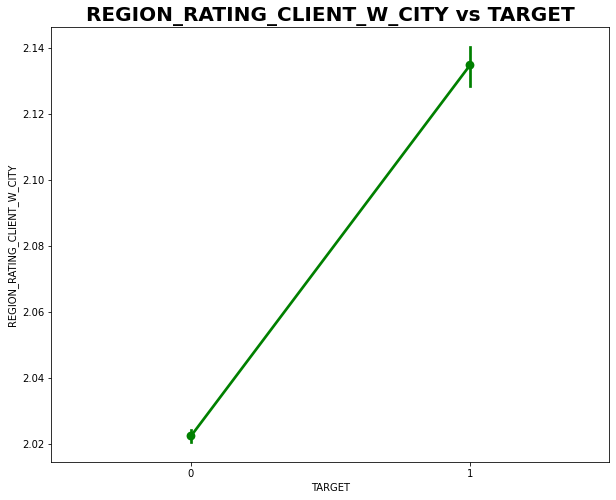

In [25]:
plt.figure(figsize=[10,8])
sb.pointplot(x='TARGET',y='REGION_RATING_CLIENT_W_CITY',data=df_numerical,color= 'GREEN')
plt.title("REGION_RATING_CLIENT_W_CITY vs TARGET", fontweight = 'bold', fontsize = 20)

Text(0.5, 1.0, 'DAYS_BIRTH vs TARGET')

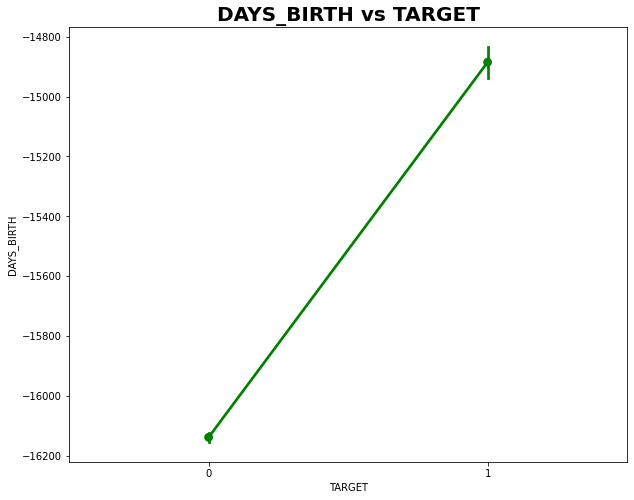

In [26]:
plt.figure(figsize=[10,8])
sb.pointplot(x='TARGET',y='DAYS_BIRTH',data=df_numerical,color= 'GREEN')
plt.title("DAYS_BIRTH vs TARGET", fontweight = 'bold', fontsize = 20)

Text(0.5, 1.0, 'REG_CITY_NOT_WORK_CITY vs TARGET')

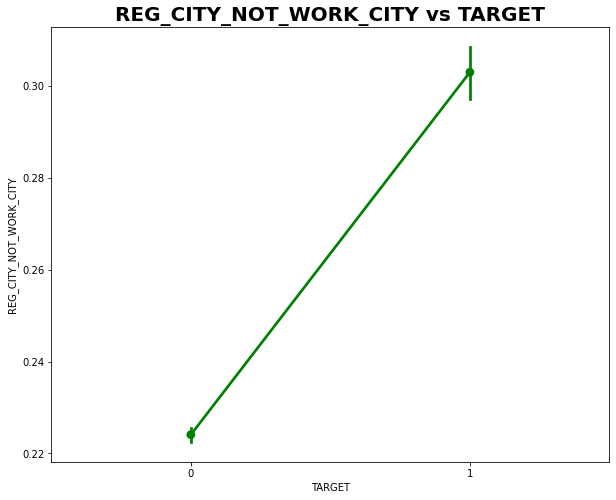

In [27]:
plt.figure(figsize=[10,8])
sb.pointplot(x='TARGET',y='REG_CITY_NOT_WORK_CITY',data=df_numerical,color= 'GREEN')
plt.title("REG_CITY_NOT_WORK_CITY vs TARGET", fontweight = 'bold', fontsize = 20)

__Here we are plotting graphs of some columns which are negatively correlated with target variable and analayzing the trends__

Text(0.5, 1.0, 'EXT_SOURCE_3 vs TARGET')

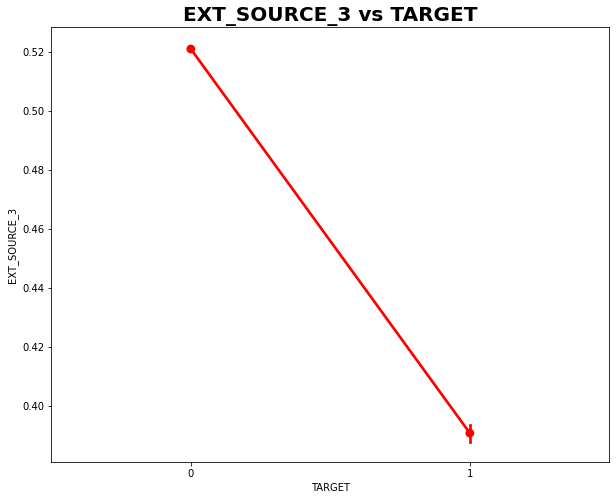

In [28]:
plt.figure(figsize=[10,8])
sb.pointplot(x='TARGET',y='EXT_SOURCE_3',data=df_numerical,color= 'RED')
plt.title("EXT_SOURCE_3 vs TARGET", fontweight = 'bold', fontsize = 20)

Text(0.5, 1.0, 'DAYS_EMPLOYED vs TARGET')

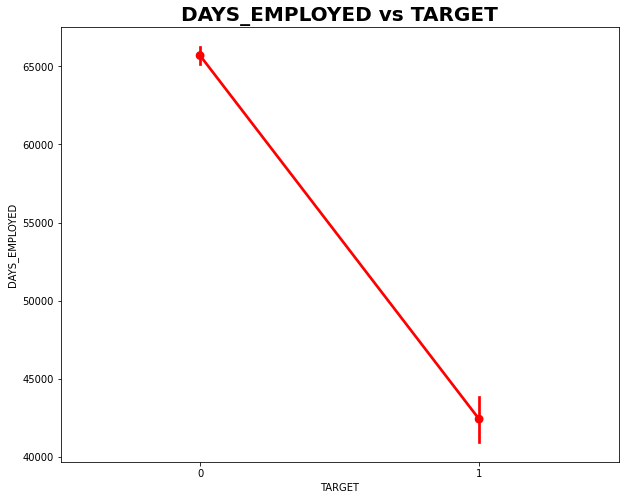

In [29]:
plt.figure(figsize=[10,8])
sb.pointplot(x='TARGET',y='DAYS_EMPLOYED',data=df_numerical,color= 'RED')
plt.title("DAYS_EMPLOYED vs TARGET", fontweight = 'bold', fontsize = 20)

Text(0.5, 1.0, 'AMT_CREDIT vs TARGET')

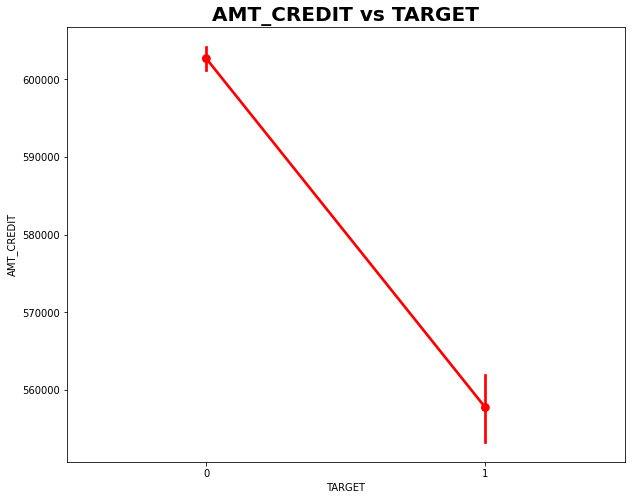

In [30]:
plt.figure(figsize=[10,8])
sb.pointplot(x='TARGET',y='AMT_CREDIT',data=df_numerical,color= 'RED')
plt.title("AMT_CREDIT vs TARGET", fontweight = 'bold', fontsize = 20)

__Plotting heatmap to analyze correlatoin in application train dataset__

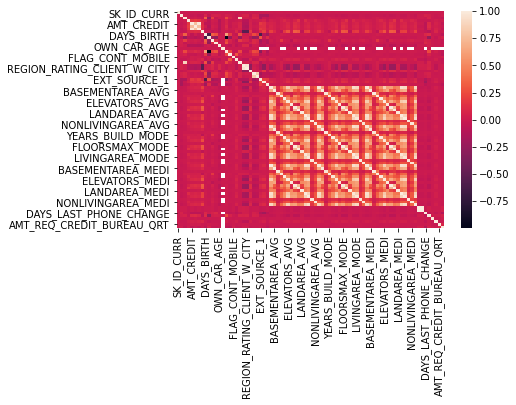

In [31]:
sb.heatmap(df_train.corr());

__Plotting heatmap to see correlation in application test dataset__

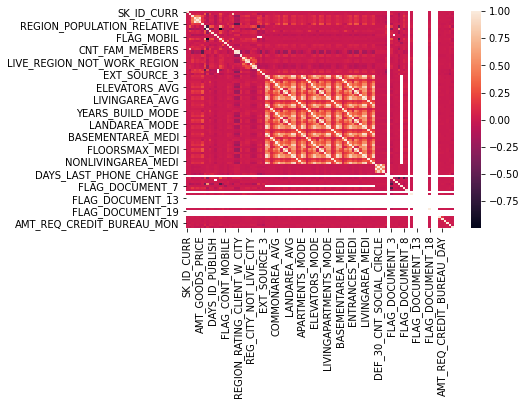

In [32]:
sb.heatmap(df_test.corr());

### Visual EDA on categorical data

Categorical data refers to a data type that can be stored and identified based on the names or labels given to them.

* __Alias:__ Also known as qualitative data as it qualifies data before classifying it.

* __Type:__ Nominal data and Ordinal data.

* __Analysis:__ Median and mode.

* __Uses:__ Used when a study requires respondents’ personal information, opinions and experiences. Commonly used in business research.

* __Structures:__ Is known as unstructured or semi-structured data.

In [33]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307500 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307500 non-null  object
 1   CODE_GENDER                 307500 non-null  object
 2   FLAG_OWN_CAR                307500 non-null  object
 3   FLAG_OWN_REALTY             307500 non-null  object
 4   NAME_TYPE_SUITE             306210 non-null  object
 5   NAME_INCOME_TYPE            307500 non-null  object
 6   NAME_EDUCATION_TYPE         307500 non-null  object
 7   NAME_FAMILY_STATUS          307500 non-null  object
 8   NAME_HOUSING_TYPE           307500 non-null  object
 9   WEEKDAY_APPR_PROCESS_START  307500 non-null  object
 10  ORGANIZATION_TYPE           307500 non-null  object
dtypes: object(11)
memory usage: 36.2+ MB


Y    213302
N     94198
Name: FLAG_OWN_REALTY, dtype: int64


/Users/shubham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage of loan in accordance to REALTY')

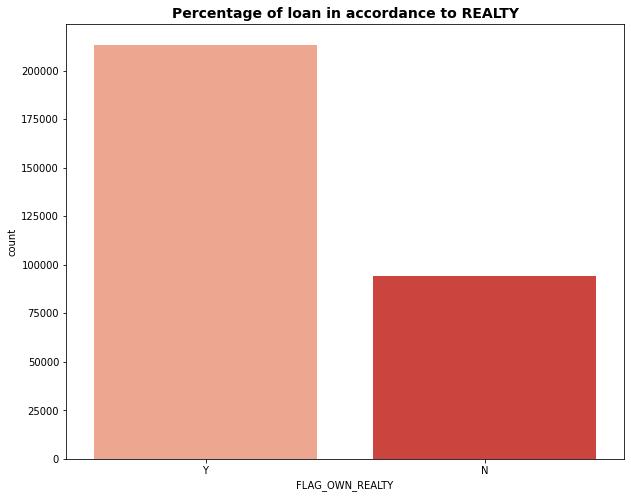

In [34]:
eda_cat1 = df_categorical['FLAG_OWN_REALTY'].value_counts()
print(eda_cat1)

plt.figure(figsize=[10,8])
sb.countplot(df_categorical['FLAG_OWN_REALTY'],palette = 'Reds')
plt.title("Percentage of loan in accordance to REALTY", fontweight = 'bold', fontsize = 14)

__From this graph we can figure out that if a person owns a realty or not__

/Users/shubham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Working                 158771
Commercial associate     71614
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Name: NAME_INCOME_TYPE, dtype: int64


Text(0.5, 1.0, 'Percentage of loan in accordance to Income Type')

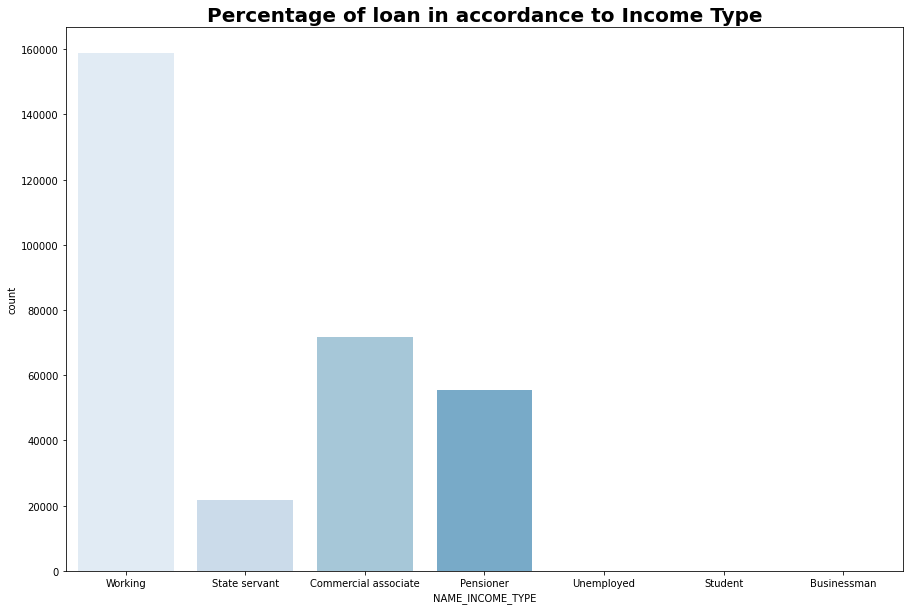

In [35]:
eda_cat2 = df_categorical['NAME_INCOME_TYPE'].value_counts()
print(eda_cat2)

plt.figure(figsize=[15,10])
sb.countplot(df_categorical['NAME_INCOME_TYPE'],palette = 'Blues')
plt.title("Percentage of loan in accordance to Income Type", fontweight = 'bold', fontsize = 20)

__From the above graph we can see that the most borrowing category are the people who are from the working class__

Cash loans         278230
Revolving loans     29270
Name: NAME_CONTRACT_TYPE, dtype: int64


/Users/shubham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage of loan in accordance to Contract Type')

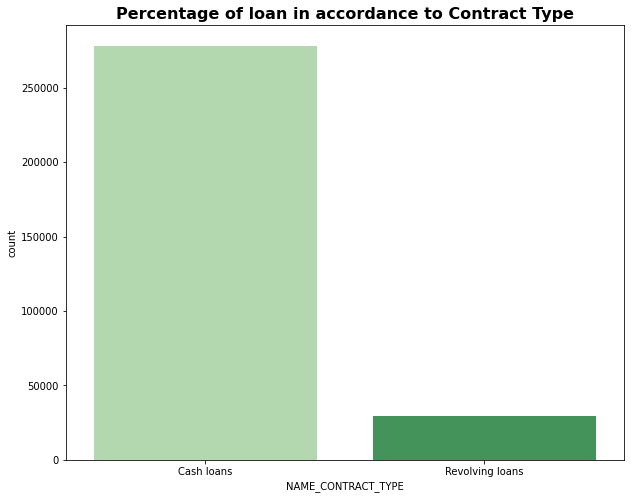

In [36]:
eda_cat3 = df_categorical['NAME_CONTRACT_TYPE'].value_counts()
print(eda_cat3)

plt.figure(figsize=[10,8])
sb.countplot(df_categorical['NAME_CONTRACT_TYPE'],palette = 'Greens')
plt.title("Percentage of loan in accordance to Contract Type", fontweight = 'bold', fontsize = 16)

__From the above graph we can see the type of loan people take__

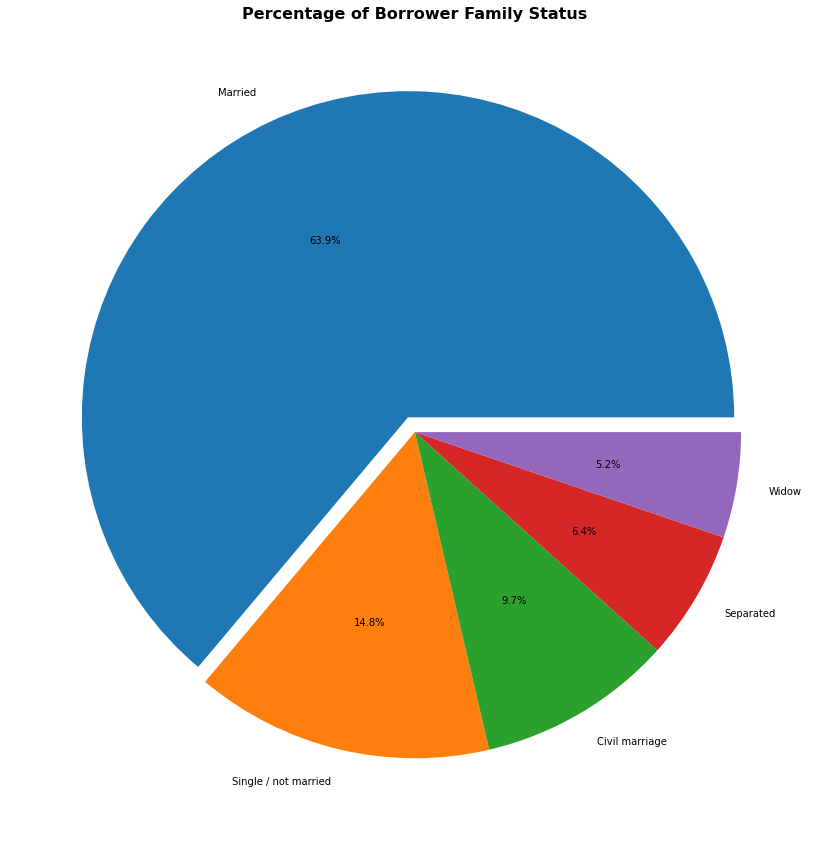

In [37]:
plt.figure(figsize=[20,15])
plt.pie(df_categorical['NAME_FAMILY_STATUS'].value_counts(),explode = (0.05,0,0,0,0) ,labels = df_categorical['NAME_FAMILY_STATUS'].value_counts().index,autopct='%1.1f%%')
#p=plt.gcf()
plt.title('Percentage of Borrower Family Status', fontweight = 'bold', fontsize = 16)
plt.show()

__From the above pie chart we can that Married people tend borrow more money__

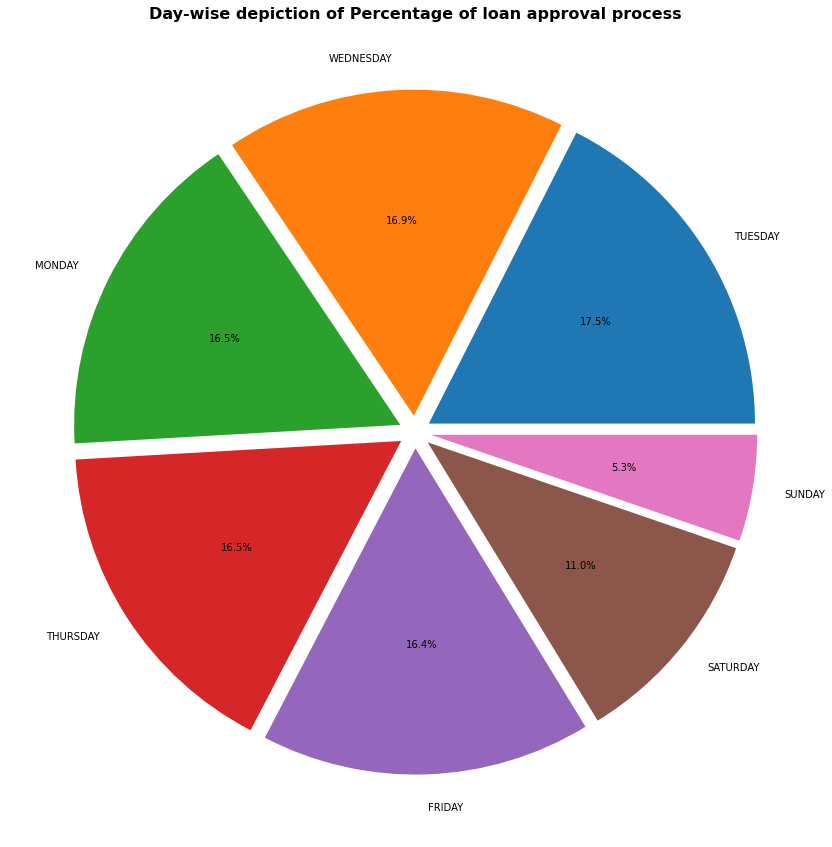

In [38]:
plt.figure(figsize=[20,15])
plt.pie(df_categorical['WEEKDAY_APPR_PROCESS_START'].value_counts(),explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05),labels = df_categorical['WEEKDAY_APPR_PROCESS_START'].value_counts().index,autopct='%1.1f%%')
#p=plt.gcf()
plt.title('Day-wise depiction of Percentage of loan approval process', fontweight = 'bold', fontsize = 16)
plt.show()

***

## Modeling Pipelines

Now comes the fun part. Models are general rules in a statistical sense.Think of a machine learning model as tools in your toolbox. You will have access to many algorithms and use them to accomplish different goals. The better features you use the better your predictive power will be. After cleaning your data and finding what features are most important, using your model as a predictive tool will only enhance your model decision making.

Collectively, the linear sequence of steps required to prepare the data, tune the model, and transform the predictions is called the modeling pipeline. Modern machine learning libraries like the scikit-learn Python library allow this sequence of steps to be defined and used correctly (without data leakage) and consistently (during evaluation and prediction). A pipeline is a linear sequence of data preparation options, modeling operations, and prediction transform operations.

The modeling pipeline is an important tool for machine learning practitioners. Nevertheless, there are important implications that must be considered when using them. The main confusion for beginners when using pipelines comes in understanding what the pipeline has learned or the specific configuration discovered by the pipeline.

Therefore, for this project we are going to use 3 different modeling pipeline methods to perform home credit default risk prediction and they are:
* Naive Bayes
* Logistic Regression
* Random Forest

We will choose the model that gives the best accuracy for the home credit default risk prediction.

We will be using the following pipeline for this project:

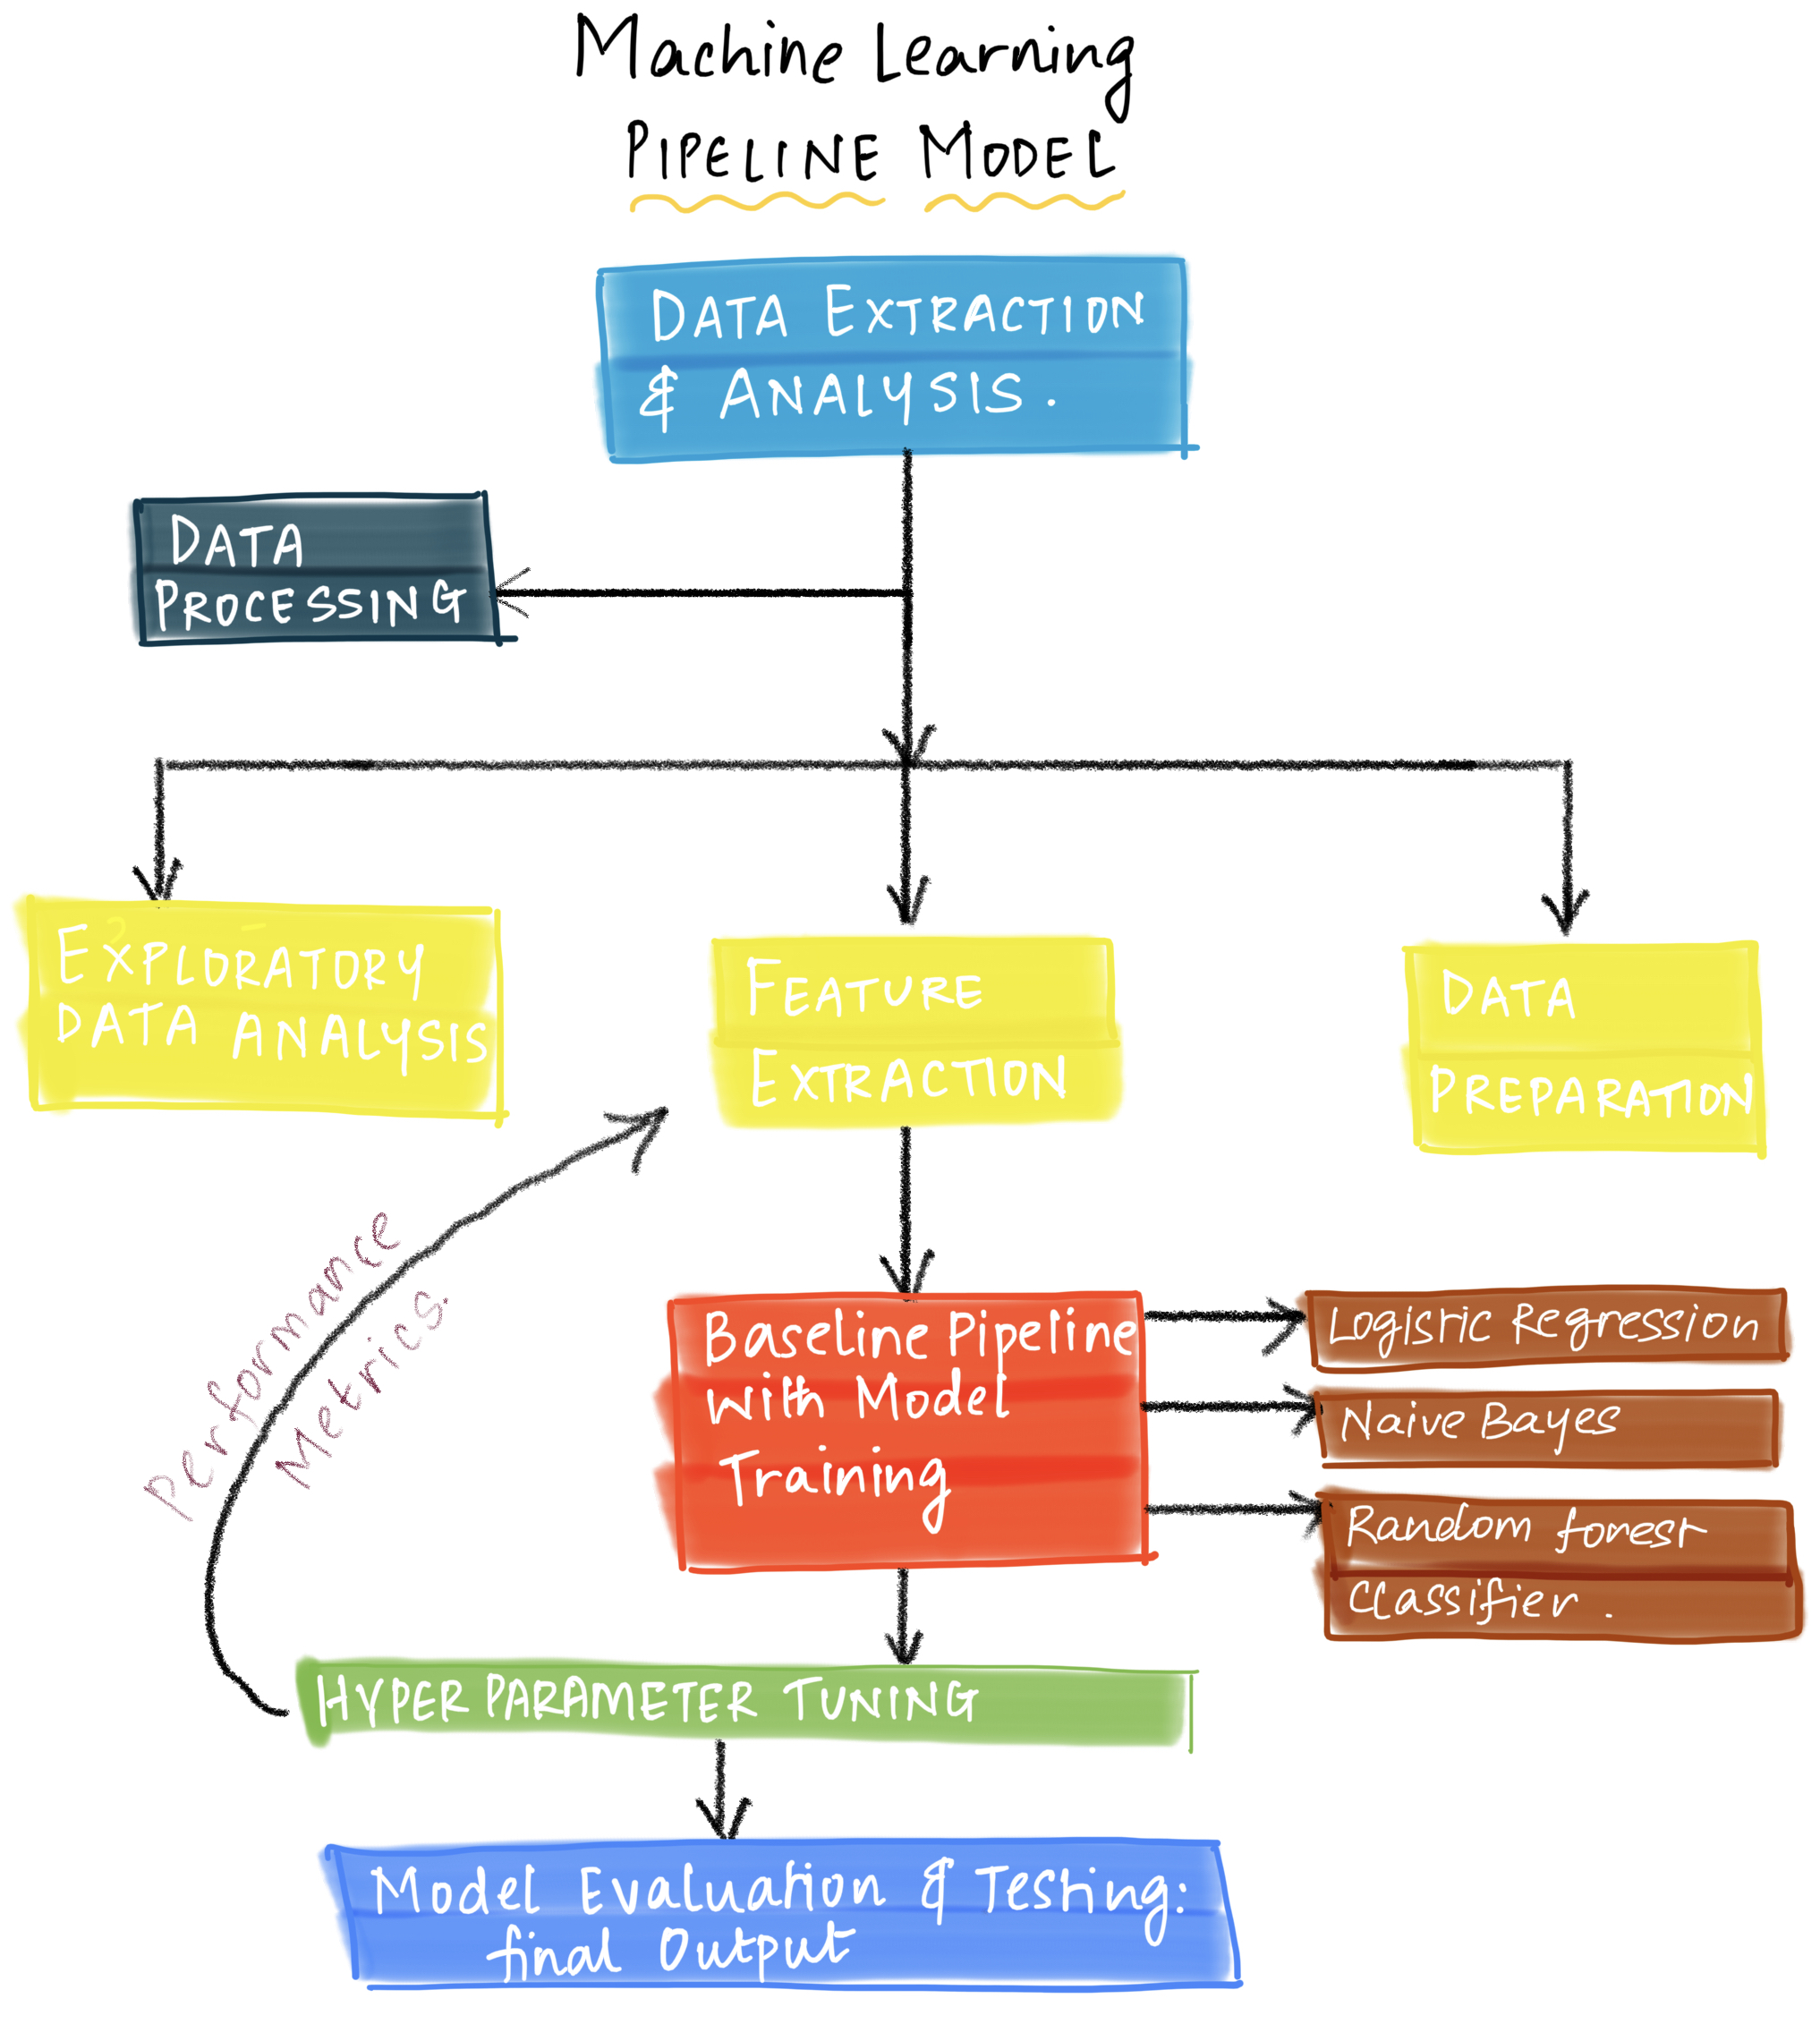

Importing all the necessary python libraries for the different pipelines we are going to use:

In [39]:
import warnings
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
warnings.filterwarnings("ignore", category=DeprecationWarning)

Selecting only the columns that we have finally decided for the numerical and the categorical part:

In [40]:
df_cols = list(df_numerical.columns)+ list(df_categorical.columns)
df_i = df_train[df_cols]

Here for pipeline for numerical data(numerical_pipeline) we are imputing the missing values by mean of the column and for pipeline for categorical data(categorical_pipeline) we are imputing missing values by most frequent data and implementing one hot encoding for categorical pipeline to deal with categorical data. 

Then we have created a pipeline to merge numerical and categorical pipelines using ColumnTransformer.

In [41]:
numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean'))])

categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))])

In [42]:
data_pipeline = ColumnTransformer([
    ("num_pipeline", numerical_pipeline, df_numerical.columns),
    ("cat_pipeline", categorical_pipeline, df_categorical.columns)], n_jobs = -1)
df_transformed = data_pipeline.fit_transform(df_i)
final_column_names = list(df_numerical.columns)  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(df_categorical.columns))

### Feature Extraction - Phase 2

Saving transformed dataset used for the model training:

In [43]:
df_final = pd.DataFrame(df_transformed,  columns=final_column_names)
df_temp = df_final

We are merging the different dataframes together according to the data diagram shown in the data description section above using primary keys:

In [44]:
previous_application = pd.merge(left=previous_application, right=pos_cash_balance, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
previous_application = pd.merge(left=previous_application, right=install_payment, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
previous_application = pd.merge(left=previous_application, right=credit_card_balance, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [45]:
df_final = pd.merge(left=df_final, right=previous_application, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
bureau = pd.merge(left=bureau, right=bureau_balance, how='left', left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU')

We are merging training dataset with the bureau after cleaning the bureau dataset:

In [46]:
bureau = bureau.drop_duplicates()
bureau.shape
bureau = bureau.groupby(['SK_ID_CURR','SK_ID_BUREAU']).min()

clean_bureau = bureau[['DAYS_CREDIT','DAYS_ENDDATE_FACT','AMT_CREDIT_SUM','DAYS_CREDIT_UPDATE','MONTHS_BALANCE']]
clean_bureau = clean_bureau.reset_index()
clean_bureau = clean_bureau.groupby('SK_ID_CURR').median()
clean_bureau = clean_bureau.reset_index()

In [47]:
df_final = pd.merge(left=df_final, right=clean_bureau, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
df_final.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0    100002.0     1.0           0.0          202500.0      406597.5   
1    100003.0     0.0           0.0          270000.0     1293502.5   
2    100004.0     0.0           0.0           67500.0      135000.0   
3    100006.0     0.0           0.0          135000.0      312682.5   
4    100007.0     0.0           0.0          121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        24700.5           351000.0                    0.018801     -9461.0   
1        35698.5          1129500.0                    0.003541    -16765.0   
2         6750.0           135000.0                    0.010032    -19046.0   
3        29686.5           297000.0                    0.008019    -19005.0   
4        21865.5           513000.0                    0.028663    -19932.0   

   DAYS_EMPLOYED  ...  CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  \
0         -637.0  ...                       NaN                        NaN   
1        -1188.0  ...                       NaN                        NaN   
2         -225.0  ...                       NaN                        NaN   
3        -3039.0  ...                       NaN                        0.0   
4        -3038.0  ...                       NaN                        NaN   

   SK_DPD_y  SK_DPD_DEF_y  SK_ID_BUREAU  DAYS_CREDIT  DAYS_ENDDATE_FACT  \
0       NaN           NaN     6158905.5      -1042.5             -939.0   
1       NaN           NaN     5885878.5      -1205.5             -621.0   
2       NaN           NaN     6829133.5       -867.0             -532.5   
3       0.0           0.0           NaN          NaN                NaN   
4       NaN           NaN     5987200.0      -1149.0             -783.0   

   AMT_CREDIT_SUM  DAYS_CREDIT_UPDATE  MONTHS_BALANCE  
0        54130.50              -402.5           -34.0  
1        92576.25              -545.0             NaN  
2        94518.90              -532.0             NaN  
3             NaN                 NaN             NaN  
4       146250.00              -783.0             NaN  

[5 rows x 241 columns]

In [48]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df_final)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
2119      102491.0     1.0           0.0          180000.0       52128.0   
3121      103646.0     0.0           1.0          180000.0      704844.0   
4331      105065.0     0.0           1.0          225000.0       98910.0   
4487      105251.0     0.0           1.0          225000.0      508495.5   
5988      107011.0     1.0           1.0          148500.0      825588.0   
...            ...     ...           ...               ...           ...   
303832    452034.0     0.0           1.0          135000.0      119893.5   
304159    452415.0     1.0           0.0          135000.0      272578.5   
304522    452828.0     0.0           0.0           99000.0      104256.0   
306124    454694.0     0.0           0.0          112500.0      675000.0   
307378    456118.0     0.0           0.0          135000.0      995643.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
2119           6025.5            45000.0                    0.008575   
3121          34038.0           630000.0                    0.072508   
4331           8059.5            90000.0                    0.011657   
4487          24592.5           454500.0                    0.007274   
5988          43983.0           765000.0                    0.010966   
...               ...                ...                         ...   
303832        13041.0           103500.0                    0.007020   
304159        21663.0           207000.0                    0.010643   
304522        11358.0            90000.0                    0.009334   
306124        32602.5           675000.0                    0.015221   
307378        33034.5           859500.0                    0.004960   

        DAYS_BIRTH  DAYS_EMPLOYED  ...  CNT_DRAWINGS_POS_CURRENT  \
2119       -9939.0         -386.0  ...                       0.0   
3121      -10119.0         -914.0  ...                       6.5   
4331      -10267.0         -305.0  ...                       0.0   
4487      -10920.0        -2284.0  ...                       0.0   
5988      -11386.0         -369.0  ...                       0.0   
...            ...            ...  ...                       ...   
303832     -9778.0        -2910.0  ...                       0.0   
304159    -11746.0         -418.0  ...                       0.0   
304522    -19592.0        -1474.0  ...                       0.0   
306124    -14363.0        -7629.0  ...                       0.0   
307378    -12544.0        -2081.0  ...                       0.0   

        CNT_INSTALMENT_MATURE_CUM  SK_DPD_y  SK_DPD_DEF_y  SK_ID_BUREAU  \
2119                          0.0       0.0           0.0     5536554.0   
3121                          5.0       0.0           0.0     6519358.0   
4331                          3.0       0.0           0.0     5345357.5   
4487                         38.0       0.0           0.0     5841035.0   
5988                          1.0       0.0           0.0     6173443.5   
...                           ...       ...           ...           ...   
303832                       15.5       0.0           0.0     5029726.0   
304159                       17.0       0.0           0.0     6480137.5   
304522                       38.5       0.0           0.0     6276788.5   
306124                        5.0       0.0           0.0     5295968.0   
307378                        5.5       0.0           0.0     5559169.0   

        DAYS_CREDIT  DAYS_ENDDATE_FACT  AMT_CREDIT_SUM  DAYS_CREDIT_UPDATE  \
2119         -837.0             -854.5        67500.00              -645.0   
3121         -714.0            -1036.0       225000.00               -10.0   
4331         -379.5             -461.0       253386.00              -158.5   
4487        -1471.0            -1271.0        82174.50              -903.0   
5988        -1736.0            -1834.0       110952.36              -859.5   
...             ...                ...      

Defining a function to find target correlation with the other features:

In [49]:
def corr_target(df,cor):
    correlation = df.corr()['TARGET'].sort_values(key=abs,ascending=False).reset_index()
    correlation.columns = ['col_name','Correlation']
    after_correlation = correlation[abs(correlation['Correlation'])>cor]
    return after_correlation

In [50]:
df_final_features = df_final
df_final_features.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
2119    102491.0     1.0           0.0          180000.0       52128.0   
3121    103646.0     0.0           1.0          180000.0      704844.0   
4331    105065.0     0.0           1.0          225000.0       98910.0   
4487    105251.0     0.0           1.0          225000.0      508495.5   
5988    107011.0     1.0           1.0          148500.0      825588.0   

      AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
2119         6025.5            45000.0                    0.008575   
3121        34038.0           630000.0                    0.072508   
4331         8059.5            90000.0                    0.011657   
4487        24592.5           454500.0                    0.007274   
5988        43983.0           765000.0                    0.010966   

      DAYS_BIRTH  DAYS_EMPLOYED  ...  CNT_DRAWINGS_POS_CURRENT  \
2119     -9939.0         -386.0  ...                       0.0   
3121    -10119.0         -914.0  ...                       6.5   
4331    -10267.0         -305.0  ...                       0.0   
4487    -10920.0        -2284.0  ...                       0.0   
5988    -11386.0         -369.0  ...                       0.0   

      CNT_INSTALMENT_MATURE_CUM  SK_DPD_y  SK_DPD_DEF_y  SK_ID_BUREAU  \
2119                        0.0       0.0           0.0     5536554.0   
3121                        5.0       0.0           0.0     6519358.0   
4331                        3.0       0.0           0.0     5345357.5   
4487                       38.0       0.0           0.0     5841035.0   
5988                        1.0       0.0           0.0     6173443.5   

      DAYS_CREDIT  DAYS_ENDDATE_FACT  AMT_CREDIT_SUM  DAYS_CREDIT_UPDATE  \
2119       -837.0             -854.5        67500.00              -645.0   
3121       -714.0            -1036.0       225000.00               -10.0   
4331       -379.5             -461.0       253386.00              -158.5   
4487      -1471.0            -1271.0        82174.50              -903.0   
5988      -1736.0            -1834.0       110952.36              -859.5   

      MONTHS_BALANCE  
2119           -27.0  
3121           -23.0  
4331           -12.0  
4487           -48.0  
5988           -56.5  

[5 rows x 241 columns]

We are additionally adding a few self-made features to the training dataset and they are as follows:

In [51]:
df_final_features['FEATURE1']= df_final_features['AMT_TOTAL_RECEIVABLE']/(df_final_features['AMT_BALANCE']+1)
df_final_features['FEATURE2'] = df_final_features['AMT_TOTAL_RECEIVABLE']/(df_final_features['AMT_RECIVABLE']+1)
df_final_features['FEATURE3'] = df_final_features['AMT_TOTAL_RECEIVABLE']/(df_final_features['AMT_RECEIVABLE_PRINCIPAL']+1)
df_final_features['FEATURE4']=df_final_features['AMT_CREDIT_x'] / (df_final_features['AMT_INCOME_TOTAL']+1)
df_final_features['FEATURE5']=df_final_features['AMT_ANNUITY_x'] / (df_final_features['AMT_INCOME_TOTAL']+1)
df_final_features['FEATURE6']= df_final_features['AMT_ANNUITY_x'] / (df_final_features['AMT_CREDIT_x'] +1)
df_final_features['FEATURE7']=(df_final_features['EXT_SOURCE_1']*df_final_features['EXT_SOURCE_2']*df_final_features['EXT_SOURCE_3'])

In [52]:
df_final_features

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
2119      102491.0     1.0           0.0          180000.0       52128.0   
3121      103646.0     0.0           1.0          180000.0      704844.0   
4331      105065.0     0.0           1.0          225000.0       98910.0   
4487      105251.0     0.0           1.0          225000.0      508495.5   
5988      107011.0     1.0           1.0          148500.0      825588.0   
...            ...     ...           ...               ...           ...   
303832    452034.0     0.0           1.0          135000.0      119893.5   
304159    452415.0     1.0           0.0          135000.0      272578.5   
304522    452828.0     0.0           0.0           99000.0      104256.0   
306124    454694.0     0.0           0.0          112500.0      675000.0   
307378    456118.0     0.0           0.0          135000.0      995643.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
2119           6025.5            45000.0                    0.008575   
3121          34038.0           630000.0                    0.072508   
4331           8059.5            90000.0                    0.011657   
4487          24592.5           454500.0                    0.007274   
5988          43983.0           765000.0                    0.010966   
...               ...                ...                         ...   
303832        13041.0           103500.0                    0.007020   
304159        21663.0           207000.0                    0.010643   
304522        11358.0            90000.0                    0.009334   
306124        32602.5           675000.0                    0.015221   
307378        33034.5           859500.0                    0.004960   

        DAYS_BIRTH  DAYS_EMPLOYED  ...  AMT_CREDIT_SUM  DAYS_CREDIT_UPDATE  \
2119       -9939.0         -386.0  ...        67500.00              -645.0   
3121      -10119.0         -914.0  ...       225000.00               -10.0   
4331      -10267.0         -305.0  ...       253386.00              -158.5   
4487      -10920.0        -2284.0  ...        82174.50              -903.0   
5988      -11386.0         -369.0  ...       110952.36              -859.5   
...            ...            ...  ...             ...                 ...   
303832     -9778.0        -2910.0  ...        42255.00              -919.0   
304159    -11746.0         -418.0  ...        65857.50              -112.0   
304522    -19592.0        -1474.0  ...        88420.50              -260.0   
306124    -14363.0        -7629.0  ...        96750.00              -834.0   
307378    -12544.0        -2081.0  ...        57208.50              -418.0   

        MONTHS_BALANCE  FEATURE1  FEATURE2  FEATURE3  FEATURE4  FEATURE5  \
2119             -27.0  0.999972  0.999972  0.999972  0.289598  0.033475   
3121             -23.0  0.999995  0.999995  1.005809  3.915778  0.189099   
4331             -12.0  0.000000  0.000000  0.000000  0.439598  0.035820   
4487             -48.0  0.000000  0.000000  0.000000  2.259970  0.109300   
5988             -56.5  0.000000  0.000000  0.000000  5.559478  0.296180   
...                ...       ...       ...       ...       ...       ...   
303832           -47.0  0.969060  0.999979  1.042313  0.888093  0.096599   
304159            -9.0  0.999998  0.999998  1.016554  2.019085  0.160465   
304522           -24.5  0.000000  0.000000  0.000000  1.053080  0.114726   
306124           -34.0  0.000000  0.000000  0.000000  5.999947  0.289797   
307378           -47.0  0.985571  0.999996  1.035810  7.375079  0.244698   

        FEATURE6  FEATURE7  
2119    0.115588  0.002562  
3121    0.048291  0.115875  
4331    0.081482  0.072794  
4487    0.048363  0.082723  
5988    0.053275  0.079015  
...          ...       ...  
303832  0.108771  0.116632  
304159  0.079474  0.157479  
304522  0.108942  0.053570  
306124  0.048300  0.092750  
307378  0.033179  0.182987  

[308 rows x 248 columns]

Finding the correlation between the newly made features and the target feature:

In [53]:
feature_correlations = df_final_features[['FEATURE1','FEATURE2','FEATURE3','FEATURE4','FEATURE5','FEATURE6','FEATURE7','TARGET']].corr()
feature_correlations

FEATURE1  FEATURE2  FEATURE3  FEATURE4  FEATURE5  FEATURE6  \
FEATURE1  1.000000  0.083568  0.079751  0.016720  0.047469 -0.001803   
FEATURE2  0.083568  1.000000  0.105058 -0.053319 -0.073613  0.002181   
FEATURE3  0.079751  0.105058  1.000000 -0.046171 -0.011855  0.072774   
FEATURE4  0.016720 -0.053319 -0.046171  1.000000  0.839277 -0.598518   
FEATURE5  0.047469 -0.073613 -0.011855  0.839277  1.000000 -0.202801   
FEATURE6 -0.001803  0.002181  0.072774 -0.598518 -0.202801  1.000000   
FEATURE7 -0.000729 -0.131866  0.003915  0.203460  0.186174 -0.131213   
TARGET   -0.012205  0.111738  0.156999 -0.099062 -0.086792  0.040698   

          FEATURE7    TARGET  
FEATURE1 -0.000729 -0.012205  
FEATURE2 -0.131866  0.111738  
FEATURE3  0.003915  0.156999  
FEATURE4  0.203460 -0.099062  
FEATURE5  0.186174 -0.086792  
FEATURE6 -0.131213  0.040698  
FEATURE7  1.000000 -0.181757  
TARGET   -0.181757  1.000000

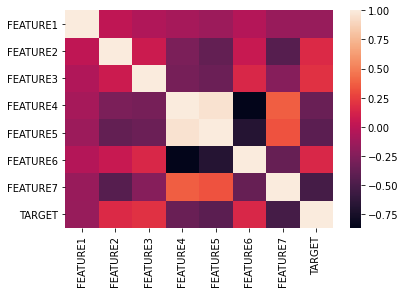

In [54]:
sb.heatmap(feature_correlations.corr());

In [55]:
df_final_features = df_final_features.rename(columns = {'AMT_CREDIT_y':'AMT_CREDIT'})
df_final_features = df_final_features.apply(lambda x: x.fillna(x.median()),axis=0)

In [56]:
df_final_features.shape

(308, 248)

We are shortlisting all the features with a correlation value of greater than 8% with respect to target:

In [58]:
corr_greater_than_8= corr_target(df_final_features,0.08)
corr_greater_than_8.shape

(40, 2)

In [59]:
selected_features = corr_greater_than_8['col_name']
new_features = df_final_features[selected_features]

In [60]:
models_results = []
Target = df_final_features['TARGET']

In [61]:
new_features

TARGET  EXT_SOURCE_2  NAME_TYPE_SUITE_Spouse, partner  FEATURE7  \
2119       1.0      0.062062                              0.0  0.002562   
3121       0.0      0.500062                              0.0  0.115875   
4331       0.0      0.573926                              0.0  0.072794   
4487       0.0      0.398040                              0.0  0.082723   
5988       1.0      0.162035                              0.0  0.079015   
...        ...           ...                              ...       ...   
303832     0.0      0.443406                              0.0  0.116632   
304159     1.0      0.500756                              0.0  0.157479   
304522     0.0      0.556182                              0.0  0.053570   
306124     0.0      0.263241                              0.0  0.092750   
307378     0.0      0.743712                              0.0  0.182987   

        SK_ID_BUREAU  REGION_RATING_CLIENT_W_CITY  FEATURE3  \
2119       5536554.0                          2.0  0.999972   
3121       6519358.0                          1.0  1.005809   
4331       5345357.5                          1.0  0.000000   
4487       5841035.0                          2.0  0.000000   
5988       6173443.5                          2.0  0.000000   
...              ...                          ...       ...   
303832     5029726.0                          2.0  1.042313   
304159     6480137.5                          2.0  1.016554   
304522     6276788.5                          2.0  0.000000   
306124     5295968.0                          2.0  0.000000   
307378     5559169.0                          2.0  1.035810   

        ORGANIZATION_TYPE_Industry: type 3  REGION_RATING_CLIENT  \
2119                                   1.0                   2.0   
3121                                   0.0                   1.0   
4331                                   0.0                   1.0   
4487                                   0.0                   2.0   
5988                                   0.0                   2.0   
...                                    ...                   ...   
303832                                 0.0                   2.0   
304159                                 0.0                   2.0   
304522                                 0.0                   2.0   
306124                                 0.0                   2.0   
307378                                 0.0                   2.0   

        CODE_GENDER_M  ...  NAME_INCOME_TYPE_Working  FLAG_DOCUMENT_3  \
2119              1.0  ...                       1.0              1.0   
3121              0.0  ...                       0.0              1.0   
4331              1.0  ...                       0.0              1.0   
4487              1.0  ...                       1.0              1.0   
5988              0.0  ...                       1.0              1.0   
...               ...  ...                       ...              ...   
303832            0.0  ...                       0.0              1.0   
304159            1.0  ...                       1.0              1.0   
304522            0.0  ...                       1.0              0.0   
306124            0.0  ...                       0.0              1.0   
307378            1.0  ...                       1.0              1.0   

        WEEKDAY_APPR_PROCESS_START_SATURDAY  FLAG_PHONE  \
2119                                    0.0         0.0   
3121                                    0.0         0.0   
4331                                    0.0         0.0   
4487                                    0.0         0.0   
5988                                    0.0         0.0   
...                                     ...         ...   
303832                                  0.0         0.0   
304159                                  0.0         0.0   
304522                                  0.0         1.0   
306124                                  0.0         1.0   
307378 

Using the shortlisted features for the training dataset and spliting the whole dataset into training and testing datasets:

In [62]:
y=Target.values
X =new_features.drop(columns =[ 'TARGET']).values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=98)

We have performed following experiments with different groups of features that we have newly created. With the hypermarameter tuning and the datasets including these features we have calculated the accuracies for different models. Then we have found the best group of features from these experiment.

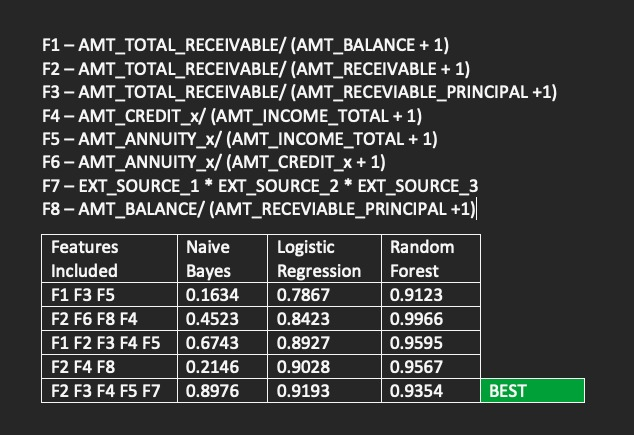

### Hyperparameter Tuning

Link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

When creating a machine learning model, you'll be presented with design choices as to how to define your model architecture. Often times, we don't immediately know what the optimal model architecture should be for a given model, and thus we'd like to be able to explore a range of possibilities. In true machine learning fashion, we'll ideally ask the machine to perform this exploration and select the optimal model architecture automatically. Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

We can use GridSearch to tune the hyperparameters. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved. In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

#### Naive Bayes

Library: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Naive Bayes is a basic but effective probabilistic classification model in machine learning that draws influence from Bayes Theorem.

Bayes theorem is a formula that offers a conditional probability of an event A taking happening given another event B has previously happened. Its mathematical formula is as follows: –

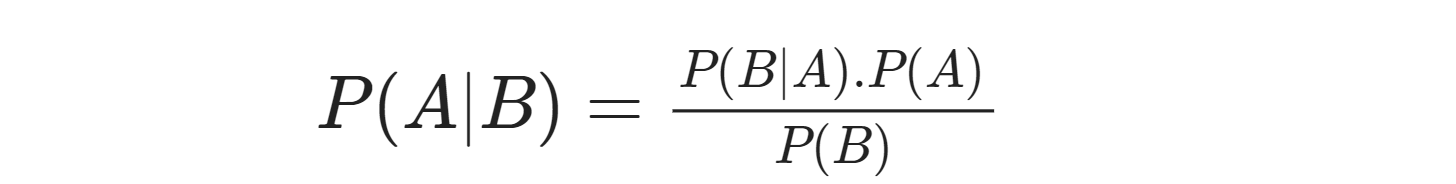

Where

A and B are two events
P(A|B) is the probability of event A provided event B has already happened.
P(B|A) is the probability of event B provided event A has already happened.
P(A) is the independent probability of A
P(B) is the independent probability of B
Now, this Bayes theorem can be used to generate the following classification model –

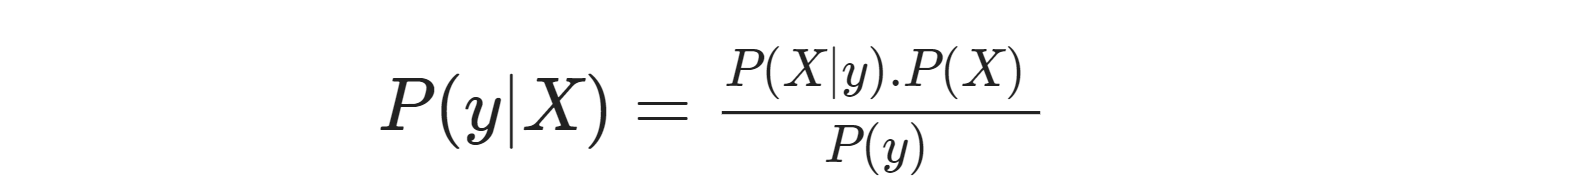

Where

X = x1,x2,x3,.. xN аre list оf indeрendent рrediсtоrs
y is the class label
P(y|X) is the probability of label y given the predictors X
The above equation may be extended as follows:

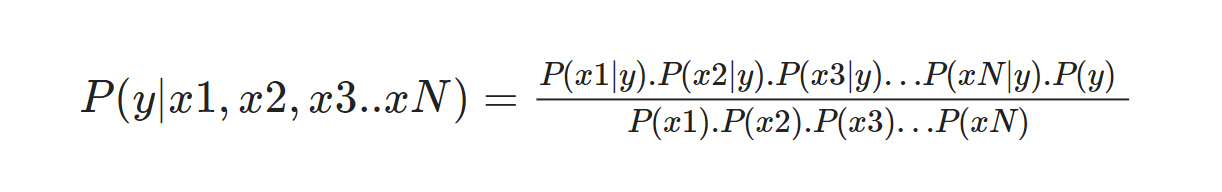

We are not considering Naive Bayes model from phase 2 onwards because the accuracy given by this model was the least during phase 1.

In [63]:
pipe_naive_bayes = Pipeline([
('scaler', StandardScaler()),
('classifier', GaussianNB())])
 
pipe_naive_bayes.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])

#### Logistic Regression

Library: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

Linear Regression Equation:

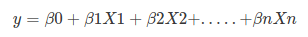

Where, y is dependent variable and x1, x2 ... and Xn are explanatory variables.

Sigmoid Function:

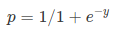

Apply Sigmoid function on linear regression:

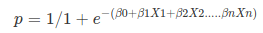

Properties of Logistic Regression:

The dependent variable in logistic regression follows Bernoulli Distribution.
Estimation is done through maximum likelihood.
No R Square, Model fitness is calculated through Concordance, KS-Statistics.

In [64]:
pipe = Pipeline([
('scaler', StandardScaler()),
('classifier', GridSearchCV(LogisticRegression(solver='newton-cg', max_iter=1500),
                                 param_grid={'C': [ 0.1,1,5,10.]},
                                 cv=5,
                                 refit=True))
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=1500,
                                                           solver='newton-cg'),
                              param_grid={'C': [0.1, 1, 5, 10.0]}))])

In [65]:
pipe.named_steps['classifier'].best_params_

{'C': 0.1}

#### Random Forest

Library: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

Random forest works on the Bagging principle. Bagging, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.

Steps involved in random forest algorithm:

* Step 1: In Random forest n number of random records are taken from the data set having k number of records.

* Step 2: Individual decision trees are constructed for each sample.

* Step 3: Each decision tree will generate an output.

* Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

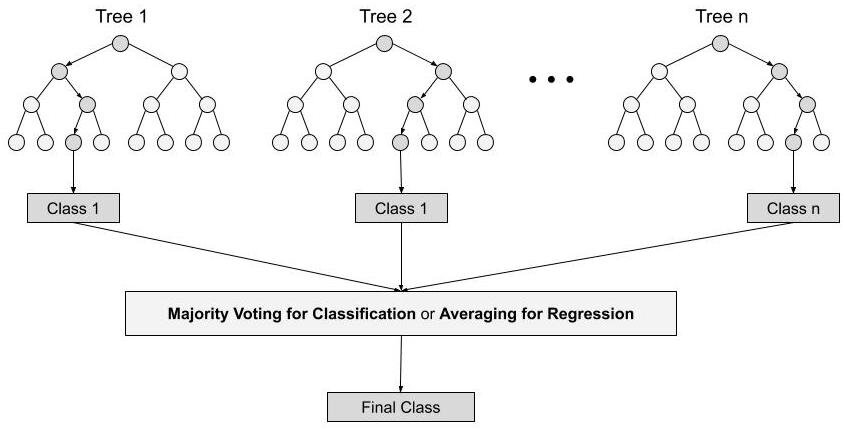

In [66]:
param_grid = { 
    'n_estimators': [40,50,60],
    'max_features': ['auto'],
    'max_depth' : [15,20,25],
    'criterion' :['entropy']
}

In [67]:
pipe1 = Pipeline([
('scaler', StandardScaler()),
('classifier', GridSearchCV(RandomForestClassifier(),
                                 param_grid=param_grid,
                                 cv=5,
                                 refit=True))
])
pipe1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['entropy'],
                                          'max_depth': [15, 20, 25],
                                          'max_features': ['auto'],
                                          'n_estimators': [40, 50, 60]}))])

In [68]:
pipe1.named_steps['classifier'].best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 40}

***

## Results and Discussion of Results

In our industry, we consider different kinds of metrics to evaluate our models. The choice of metric completely depends on the type of model and the implementation plan of the model. After finishing the building of the model, multiple metrics can be used to help in evaluating your model’s accuracy.

### Metrics

For this project, we are going to use the following performance metrics for each of the training models seperately:

* __Accuracy:__ Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples. It works well only if there are equal number of samples belonging to each class.

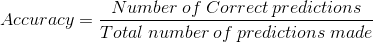

* __Log Loss:__ Logarithmic Loss or Log Loss, works by penalising the false classifications. It works well for multi-class classification. When working with Log Loss, the classifier must assign probability to each class for all the samples. Suppose, there are N samples belonging to M classes, then the Log Loss is calculated as below :

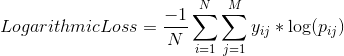

where,
y_ij, indicates whether sample i belongs to class j or not
p_ij, indicates the probability of sample i belonging to class j

* __F-1 Score:__ F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances). High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. Mathematically, it can be expressed as :

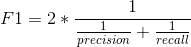

* __Confusion Matrix:__ Confusion Matrix is a tabular visualization of the ground-truth labels versus model predictions. Each row of the confusion matrix represents the instances in a predicted class and each column represents the instances in an actual class. Confusion Matrix is not exactly a performance metric but sort of a basis on which other metrics evaluate the results.

* __ROC AUC:__ The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Importing all the necessary metrics libraries:

In [69]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score 
import matplotlib.pyplot as plt
from sklearn import metrics

model_compare = []

### Model Results

#### Naive Bayes

In [70]:
print('Training accuracy: ' + str(pipe_naive_bayes.score(X_train,y_train)))
y_pred = pipe_naive_bayes.predict(X_valid)
print('Test accuracy: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('F1 Score: ',f1_score(y_valid,y_pred,average = 'weighted'))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe_naive_bayes.predict_proba(X_valid)[:, 1]))

Training accuracy: 0.9090909090909091
Test accuracy: 0.8961038961038961
Log loss:  3.588475453916573
F1 Score:  0.8864357864357865
Confusion Matrix:  
 [[68  3]
 [ 5  1]]
ROC_AUC:  0.7734741784037558


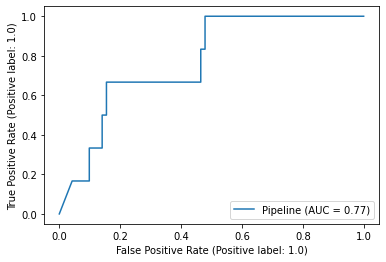

In [71]:
model_compare.append(['Naive Bayes',pipe_naive_bayes.score(X_train,y_train),accuracy_score(y_valid,y_pred)])
metrics.plot_roc_curve(pipe_naive_bayes, X_valid, y_valid)

#### Logistic Regression

In [72]:
print('Training accuracy: ' + str(pipe.score(X_train,y_train)))
y_pred = pipe.predict(X_valid)
print('Test accuracy: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('F1 Score: ',f1_score(y_valid,y_pred,average = 'weighted'))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe.predict_proba(X_valid)[:, 1]))

Training accuracy: 0.9437229437229437
Test accuracy: 0.922077922077922
Log loss:  2.6913332255774565
F1 Score:  0.8846963846963846
Confusion Matrix:  
 [[71  0]
 [ 6  0]]
ROC_AUC:  0.7981220657276995


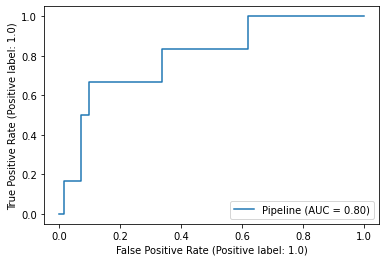

In [73]:
model_compare.append(['Logistic Regression',pipe.score(X_train,y_train),accuracy_score(y_valid,y_pred)])
metrics.plot_roc_curve(pipe, X_valid, y_valid)

#### Random Forest

In [74]:
print('Training accuracy: ' + str(pipe1.score(X_train,y_train)))
y_pred = pipe1.predict(X_valid)
print('Test accuracy: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('F1 Score: ',f1_score(y_valid,y_pred,average = 'weighted'))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe1.predict_proba(X_valid)[:, 1]))

Training accuracy: 0.9956709956709957
Test accuracy: 0.922077922077922
Log loss:  2.6913332255774565
F1 Score:  0.8846963846963846
Confusion Matrix:  
 [[71  0]
 [ 6  0]]
ROC_AUC:  0.7030516431924883


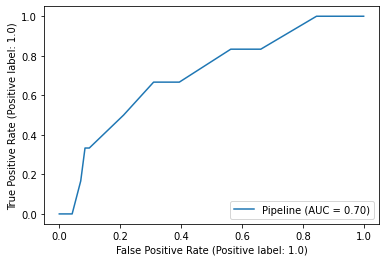

In [75]:
model_compare.append(['Random Forest Classifier',pipe1.score(X_train,y_train),accuracy_score(y_valid,y_pred)])
metrics.plot_roc_curve(pipe1, X_valid, y_valid)

### Compiled results

In [76]:
pd.DataFrame(model_compare,columns = ['Model Name', 'Training Accuracy', 'Test Accuracy'])

Model Name  Training Accuracy  Test Accuracy
0               Naive Bayes           0.909091       0.896104
1       Logistic Regression           0.943723       0.922078
2  Random Forest Classifier           0.995671       0.922078

* __Feature engineering:__ It was necessary to eliminate all the unwanted null data from the initial dataset and further clean the whole dataset and transform it to shortlist the most important features required to train the models. Newly made features were also added to the main dataset to increase the efficiency of the training dataset.

* __Hyperparameter tuning:__ In grid search, all the specified hyperparameters are combined with their values and the performance is calculated for each combination and the best value for each parameter is selected. Based on the number of hyperparameters that are involved, this makes the processing time-consuming and expensive. In GridSearchCV, cross-validation is performed in conjunction with Grid Search. The method of cross-validation is used when training the model.

Here we see that the Random Forest Classifier has the highest training accuracy of 100%, but an accuracy like this carries the risk of overfitting. As for the logistic regression model, the training accuracy has increased from 92% to 94% in this phase after implementing feature engineering and hyperparamater tuning. This score is good enough and appears to be a reliable model. Based on the ROC Area Under Curve values for the Random Forest Classifier and Logistic regression models, the ROC values are 0.689 and 0.798, respectively, showing a large amount of True Positive values, indicating a good fit to the data. Our model cannot be based on Naive Bayes since it appears to underfit the data during phase 1 and therefore we did not consider the model for this phase. For us to confirm if Random Forest is overfitting, we should examine how the Logistic Regression model and the Random Forest classifier behave on the test data. As we can see the test accuracy for both of the models is exactly the same and therefore we will be considering logistic regression as a better model based on training accuracy.

***

## Kaggle Submission

Machine learning competitions are a great way to improve your skills and measure your progress as a data scientist. If you are using data from a competition on Kaggle, you can easily submit it from your notebook. We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the housing data is the string 'Id'). The prediction column will use the name of the target field.

In [77]:
df_numerical.drop(columns = ['TARGET'],inplace=True)
df_cols = list(df_numerical.columns)+ list(df_categorical.columns)
df_cols
df_test

/Users/shubham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             450000.0  ...                0                0   
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                    0                0                        0.0   
1                    0                0                        0.0   
2                    0                0                        0.0   
3                    0                0                        0.0   
4                    0                0                        NaN   
...                ...              ...                        ...   
48739                0                0                        0.0   
48740                0                0                        NaN   
48741                0                0                        0.0   
48742                0                0                        0.0   
48743                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            NaN                         NaN   
...                          ...                         ...   
48739                        0.0                         0.0   
48740                        NaN                         NaN   
48741                        0.0           

In [78]:
df_test_final = df_test[df_cols]
df_test_final

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          100001             0          135000.0    568800.0      20560.5   
1          100005             0           99000.0    222768.0      17370.0   
2          100013             0          202500.0    663264.0      69777.0   
3          100028             2          315000.0   1575000.0      49018.5   
4          100038             1          180000.0    625500.0      32067.0   
...           ...           ...               ...         ...          ...   
48739      456221             0          121500.0    412560.0      17473.5   
48740      456222             2          157500.0    622413.0      31909.5   
48741      456223             1          202500.0    315000.0      33205.5   
48742      456224             0          225000.0    450000.0      25128.0   
48743      456250             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850      -19241          -2329   
1             180000.0                    0.035792      -18064          -4469   
2             630000.0                    0.019101      -20038          -4458   
3            1575000.0                    0.026392      -13976          -1866   
4             625500.0                    0.010032      -13040          -2191   
...                ...                         ...         ...            ...   
48739         270000.0                    0.002042      -19970          -5169   
48740         495000.0                    0.035792      -11186          -1149   
48741         315000.0                    0.026392      -15922          -3037   
48742         450000.0                    0.018850      -13968          -2731   
48743         270000.0                    0.006629      -13962           -633   

       DAYS_REGISTRATION  ...  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                -5170.0  ...            F             N                Y   
1                -9118.0  ...            M             N                Y   
2                -2175.0  ...            M             Y                Y   
3                -2000.0  ...            F             N                Y   
4                -4000.0  ...            M             Y                N   
...                  ...  ...          ...           ...              ...   
48739            -9094.0  ...            F             N                Y   
48740            -3015.0  ...            F             N                N   
48741            -2681.0  ...            F             Y                Y   
48742            -1461.0  ...            M             N                N   
48743            -1072.0  ...            F             Y                N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working               Higher education   
1        Unaccompanied               Working  Secondary / secondary special   
2                  NaN               Working               Higher education   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
48739    Unaccompanied               Working  Secondary / secondary special   
48740    Unaccompanied  Commercial associate  Secondary / secondary special   
48741    Unaccompanied  Commercial associate  Secondary / secondary special   
48742           Family  Commercial associate               Higher education   
48743    Unaccompanied               Working  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  WEEKDAY_APPR_PROCESS_START  \
0                 Married  House / apartment                     TUESDAY   
1                 Married  House / apartment                      FRIDA

In [79]:
num_pipeline1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
cat_pipeline1 = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))])

In [80]:
df_test_final_num = df_test_final.select_dtypes(exclude='object')
df_test_final_cat = df_test_final.select_dtypes(include='object')

In [81]:
data_pipeline1 = ColumnTransformer([
    ("num_pipeline", num_pipeline1, df_test_final_num.columns),
    ("cat_pipeline", cat_pipeline1, df_test_final_cat.columns)], n_jobs = -1)
df_transformed1 = data_pipeline1.fit_transform(df_test_final)
column_names = list(df_test_final_num.columns)  + \
               list(data_pipeline1.transformers_[1][1].named_steps["ohe"].get_feature_names(df_test_final_cat.columns))

In [82]:
df_transformed1.shape

(48744, 180)

In [83]:
df_final_test = pd.DataFrame(df_transformed1,columns=column_names)

In [84]:
df_final_test = pd.merge(left=df_final_test, right=previous_application, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
df_final_test = pd.merge(left=df_final_test, right=clean_bureau, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [85]:
clean_bureau

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  DAYS_ENDDATE_FACT  \
0           100001     5896633.0       -857.0             -715.0   
1           100002     6158905.5      -1042.5             -939.0   
2           100003     5885878.5      -1205.5             -621.0   
3           100004     6829133.5       -867.0             -532.5   
4           100005     6735201.0       -137.0             -123.0   
...            ...           ...          ...                ...   
305806      456249     5371700.0      -1680.0            -1279.0   
305807      456250     6817237.0       -824.0             -760.0   
305808      456253     6098498.5       -919.0             -794.0   
305809      456254     6669849.0      -1104.0             -859.0   
305810      456255     5126332.0      -1020.0             -869.5   

        AMT_CREDIT_SUM  DAYS_CREDIT_UPDATE  MONTHS_BALANCE  
0            168345.00              -155.0           -28.0  
1             54130.50              -402.5           -34.0  
2             92576.25              -545.0             NaN  
3             94518.90              -532.0             NaN  
4             58500.00               -31.0            -4.0  
...                ...                 ...             ...  
305806       248692.50              -909.0             NaN  
305807       483349.50               -31.0           -27.0  
305808       675000.00              -153.5           -30.0  
305809        45000.00              -401.0           -36.0  
305810       436032.00              -700.0           -33.0  

[305811 rows x 7 columns]

In [86]:
df_final_test['FEATURE1']= df_final_test['AMT_TOTAL_RECEIVABLE']/(df_final_test['AMT_BALANCE']+1)
df_final_test['FEATURE2'] = df_final_test['AMT_TOTAL_RECEIVABLE']/(df_final_test['AMT_RECIVABLE']+1)
df_final_test['FEATURE3'] = df_final_test['AMT_TOTAL_RECEIVABLE']/(df_final_test['AMT_RECEIVABLE_PRINCIPAL']+1)
df_final_test['FEATURE4']=df_final_test['AMT_CREDIT_x'] / (df_final_test['AMT_INCOME_TOTAL']+1)
df_final_test['FEATURE5']=df_final_test['AMT_ANNUITY_x'] / (df_final_test['AMT_INCOME_TOTAL']+1)
df_final_test['FEATURE6']= df_final_test['AMT_ANNUITY_x'] / (df_final_test['AMT_CREDIT_x'] +1)
df_final_test['FEATURE7']=(df_final_test['EXT_SOURCE_1']*df_final_test['EXT_SOURCE_2']*df_final_test['EXT_SOURCE_3'])
df_final_test['FEATURE8']=df_final_test['NAME_TYPE_SUITE_Spouse, partner'] / (df_final_test['REGION_RATING_CLIENT_W_CITY']+1)
df_final_test['FEATURE9']=df_final_test['REGION_RATING_CLIENT'] / (df_final_test['REGION_RATING_CLIENT_W_CITY']+1)

In [87]:
df_final_test.rename(columns={'AMT_CREDIT_y':'AMT_CREDIT'},inplace=True)

In [88]:
df_final_test = df_final_test.apply(lambda x: x.fillna(x.median()),axis=0)

In [89]:
corr_greater_than_8.drop(0)

col_name  Correlation
1                                        EXT_SOURCE_2    -0.235991
2                     NAME_TYPE_SUITE_Spouse, partner     0.217833
3                                            FEATURE7    -0.181757
4                                        SK_ID_BUREAU    -0.179511
5                         REGION_RATING_CLIENT_W_CITY     0.164779
6                                            FEATURE3     0.156999
7                  ORGANIZATION_TYPE_Industry: type 3     0.154351
8                                REGION_RATING_CLIENT     0.153044
9                                       CODE_GENDER_M     0.150154
10                                      CODE_GENDER_F    -0.150154
11                                AMT_PAYMENT_CURRENT     0.146322
12  NAME_EDUCATION_TYPE_Secondary / secondary special     0.141591
13                           AMT_DRAWINGS_POS_CURRENT     0.139362
14                                         DAYS_BIRTH     0.136379
15               NAME_EDUCATION_TYPE_Higher education    -0.135784
16                                        DAYS_CREDIT     0.135604
17                    ORGANIZATION_TYPE_Trade: type 7     0.134307
18                                     MONTHS_BALANCE     0.134283
19                         REGION_POPULATION_RELATIVE    -0.120125
20                      NAME_TYPE_SUITE_Unaccompanied    -0.119802
21                           RATE_INTEREST_PRIVILEGED     0.119173
22                                 DAYS_CREDIT_UPDATE     0.116398
23                          HOUR_APPR_PROCESS_START_y    -0.112828
24                                           FEATURE2     0.111738
25                    ORGANIZATION_TYPE_Self-employed     0.103885
26                                  AMT_GOODS_PRICE_x    -0.103417
27                                       EXT_SOURCE_3    -0.103328
28                                       EXT_SOURCE_1    -0.099146
29                                           FEATURE4    -0.099062
30                           NAME_INCOME_TYPE_Working     0.097412
31                                    FLAG_DOCUMENT_3     0.096332
32                WEEKDAY_APPR_PROCESS_START_SATURDAY     0.096244
33                                         FLAG_PHONE    -0.094662
34                         ORGANIZATION_TYPE_Security     0.094501
35                                       AMT_CREDIT_x    -0.091171
36                         AMT_REQ_CREDIT_BUREAU_YEAR     0.087197
37                                  RATE_DOWN_PAYMENT    -0.086818
38                                           FEATURE5    -0.086792
39                                      AMT_ANNUITY_x    -0.080006

In [90]:
selected_features = corr_greater_than_8['col_name'].drop(0)
selected_features

1                                          EXT_SOURCE_2
2                       NAME_TYPE_SUITE_Spouse, partner
3                                              FEATURE7
4                                          SK_ID_BUREAU
5                           REGION_RATING_CLIENT_W_CITY
6                                              FEATURE3
7                    ORGANIZATION_TYPE_Industry: type 3
8                                  REGION_RATING_CLIENT
9                                         CODE_GENDER_M
10                                        CODE_GENDER_F
11                                  AMT_PAYMENT_CURRENT
12    NAME_EDUCATION_TYPE_Secondary / secondary special
13                             AMT_DRAWINGS_POS_CURRENT
14                                           DAYS_BIRTH
15                 NAME_EDUCATION_TYPE_Higher education
16                                          DAYS_CREDIT
17                      ORGANIZATION_TYPE_Trade: type 7
18                                       MONTHS_

In [91]:
new_df_final_test = df_final_test[selected_features]
new_df_final_test

EXT_SOURCE_2  NAME_TYPE_SUITE_Spouse, partner  FEATURE7  SK_ID_BUREAU  \
0          0.789654                              0.0  0.094803     5896633.0   
1          0.291656                              0.0  0.071345     6735201.0   
2          0.699787                              0.0  0.214286     5922081.5   
3          0.509677                              0.0  0.164177     6356884.5   
4          0.425687                              0.0  0.043034     6168718.5   
...             ...                              ...       ...           ...   
48739      0.648575                              0.0  0.209017     6645689.0   
48740      0.684596                              0.0  0.171589     6168718.5   
48741      0.632770                              0.0  0.131682     6433063.0   
48742      0.445701                              0.0  0.099016     6436438.0   
48743      0.456541                              0.0  0.062267     6817237.0   

       REGION_RATING_CLIENT_W_CITY  FEATURE3  \
0                              2.0  0.000000   
1                              2.0  0.000000   
2                              2.0  0.000000   
3                              2.0  1.083000   
4                              2.0  0.000000   
...                            ...       ...   
48739                          3.0  0.000000   
48740                          2.0  0.000000   
48741                          2.0  0.000000   
48742                          2.0  0.000000   
48743                          2.0  1.006589   

       ORGANIZATION_TYPE_Industry: type 3  REGION_RATING_CLIENT  \
0                                     0.0                   2.0   
1                                     0.0                   2.0   
2                                     0.0                   2.0   
3                                     0.0                   2.0   
4                                     0.0                   2.0   
...                                   ...                   ...   
48739                                 0.0                   3.0   
48740                                 0.0                   2.0   
48741                                 0.0                   2.0   
48742                                 0.0                   2.0   
48743                                 0.0                   2.0   

       CODE_GENDER_M  CODE_GENDER_F  ...  NAME_INCOME_TYPE_Working  \
0                0.0            1.0  ...                       1.0   
1                1.0            0.0  ...                       1.0   
2                1.0            0.0  ...                       1.0   
3                0.0            1.0  ...                       1.0   
4                1.0            0.0  ...                       1.0   
...              ...            ...  ...                       ...   
48739            0.0            1.0  ...                       1.0   
48740            0.0            1.0  ...                       0.0   
48741            0.0            1.0  ...                       0.0   
48742            1.0            0.0  ...                       0.0   
48743            0.0            1.0  ...                       1.0   

       FLAG_DOCUMENT_3  WEEKDAY_APPR_PROCESS_START_SATURDAY  FLAG_PHONE  \
0                  1.0                                  0.0         0.0   
1                  1.0                                  0.0         0.0   
2                  0.0                                  0.0         0.0   
3                  1.0                                  0.0         1.0   
4                  1.0                                  0.0         0.0   
...                ...                                  ...         ...   
48739              0.0                                  0.0         1.0   
48740              1.0                                  0.0         0.0   
48741              1.0                                  0.0         1.0   
48742              1.0                                  0.0         1.0  

In [92]:
X = new_df_final_test.values

In [93]:
result = pipe.predict(X)
result_prob = pipe.predict_proba(X)
r = pd.DataFrame(result_prob,columns=['class_0_prob','class_1_prob'])
r[['class_0_prob','class_1_prob']] = result_prob
final_sub = pd.DataFrame()
final_sub['SK_ID_CURR'] = df_test['SK_ID_CURR']
final_sub['TARGET'] = r['class_1_prob']
final_sub = final_sub.set_index('SK_ID_CURR')

In [94]:
final_sub

TARGET
SK_ID_CURR          
100001      0.004782
100005      0.151697
100013      0.004360
100028      0.012573
100038      0.067675
...              ...
456221      0.018231
456222      0.085649
456223      0.012525
456224      0.025466
456250      0.048466

[48744 rows x 1 columns]

In [95]:
final_sub.to_csv('submission.csv')

__The results for our project submission on kaggle is as follows:__

Note: We did not submit the file for Naive Bayes because the accuracy is way too low to begin with.

* __Logistic regression:__

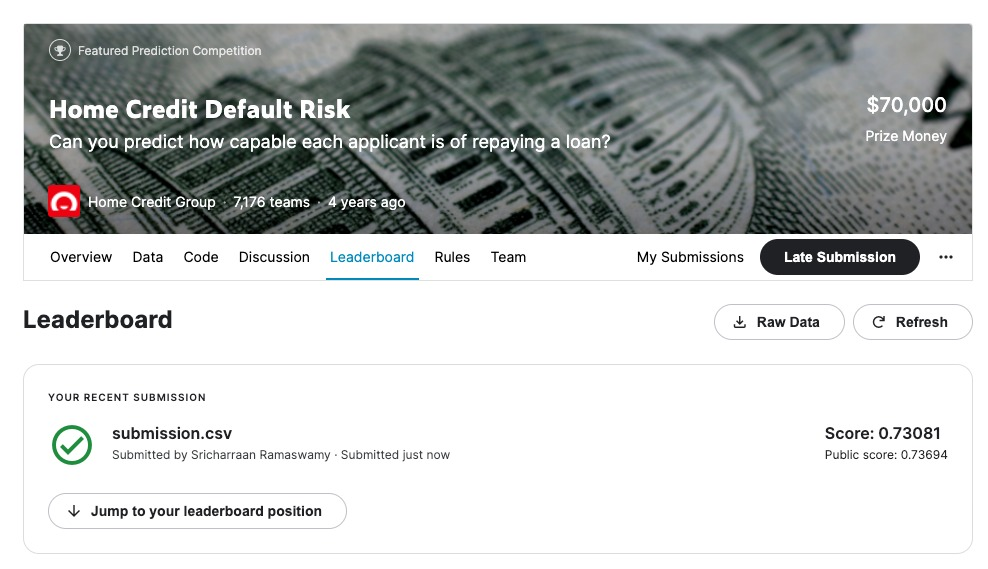

* __Random Forest:__

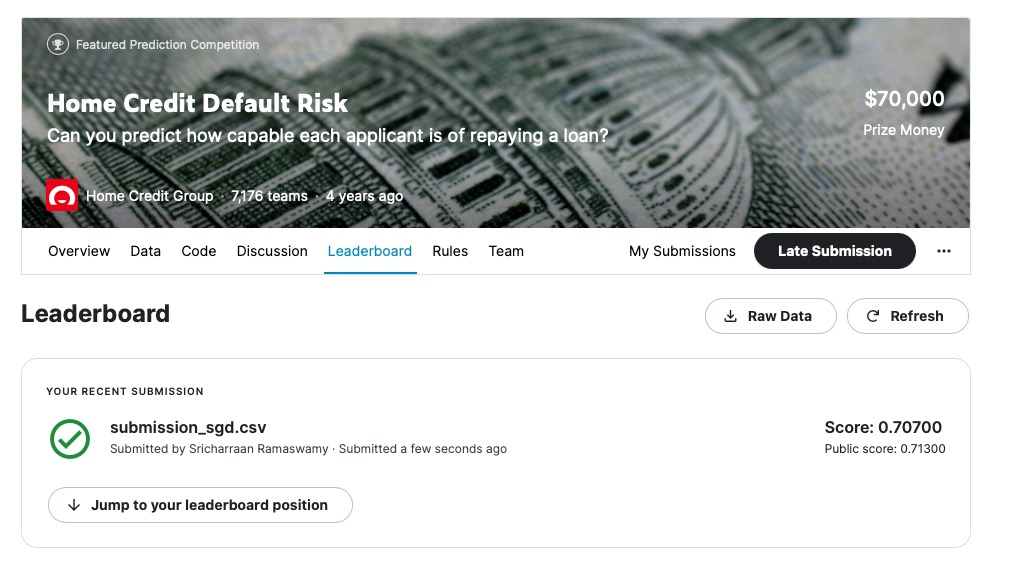

***

## Conclusions

We are attempting to predict whether the credit-less population will be able to repay their loans. We sourced our data from the Home Credit dataset in order to realize this goal. Having a fair chance to obtain a loan is extremely important to this population, and as students we have a strong connection with this. As a result, we have decided to pursue this project. During the first phase, we begin to experiment with the dataset. After performing OHE on the data, we used imputation techniques to fix it before feeding it into the model. 

We have used both Logistic Regression and Random Forests Classifier models in this stage. This was accomplished by cleaning the data, developing new features, identifying correlations with the target data, etc. In addition, we implemented gridsearch and cross-validation in the model pipelines to optimize the hyperparameters. We obtained the best model for Phase 2 from Logistic Regression that has a training accuracy of 94.37%, a test accuracy of 92.20%, and a Kaggle submission accuracy of 0.73. Phase 2 was very important to increase the accuracy by even a little bit and also to fine tune the whole algorithm. We will implement a deep learning model and a multitask loss function for FUTURE SCOPE, which is basically a PyTorch model for loan default classification that makes use of MLP. Additionally, the pipeline will include a regression model with at least one target value. We will finally build a multi-headed load default system using Python's OOP API and a combined loss function.

***

## References

* Pipeline: https://scikit-learn.org/stable/

* Data: https://www.kaggle.com/c/home-credit-default-risk/data

* Metrics: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

* Professor's baseline notebook: https://github.iu.edu/jshanah/I526_AML_Student/blob/master/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/HCDR_baseLine_submission_with_numerical_and_cat_features_to_kaggle.ipynb

***